In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

## Statistical Analysis
from scipy import stats
from scipy.stats import norm,skew

# Display all Columns
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
train_path = r"/content/drive/MyDrive/Genetic_Disorder/dataset/train (2).csv"
test_path = r"/content/drive/MyDrive/Genetic_Disorder/dataset/test (1).csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train.head(3)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,NaN,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [ ]:
train.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print("Dimensionality of the train dataset: ", train.shape)

Dimensionality of the train dataset:  (22083, 45)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

<Axes: >

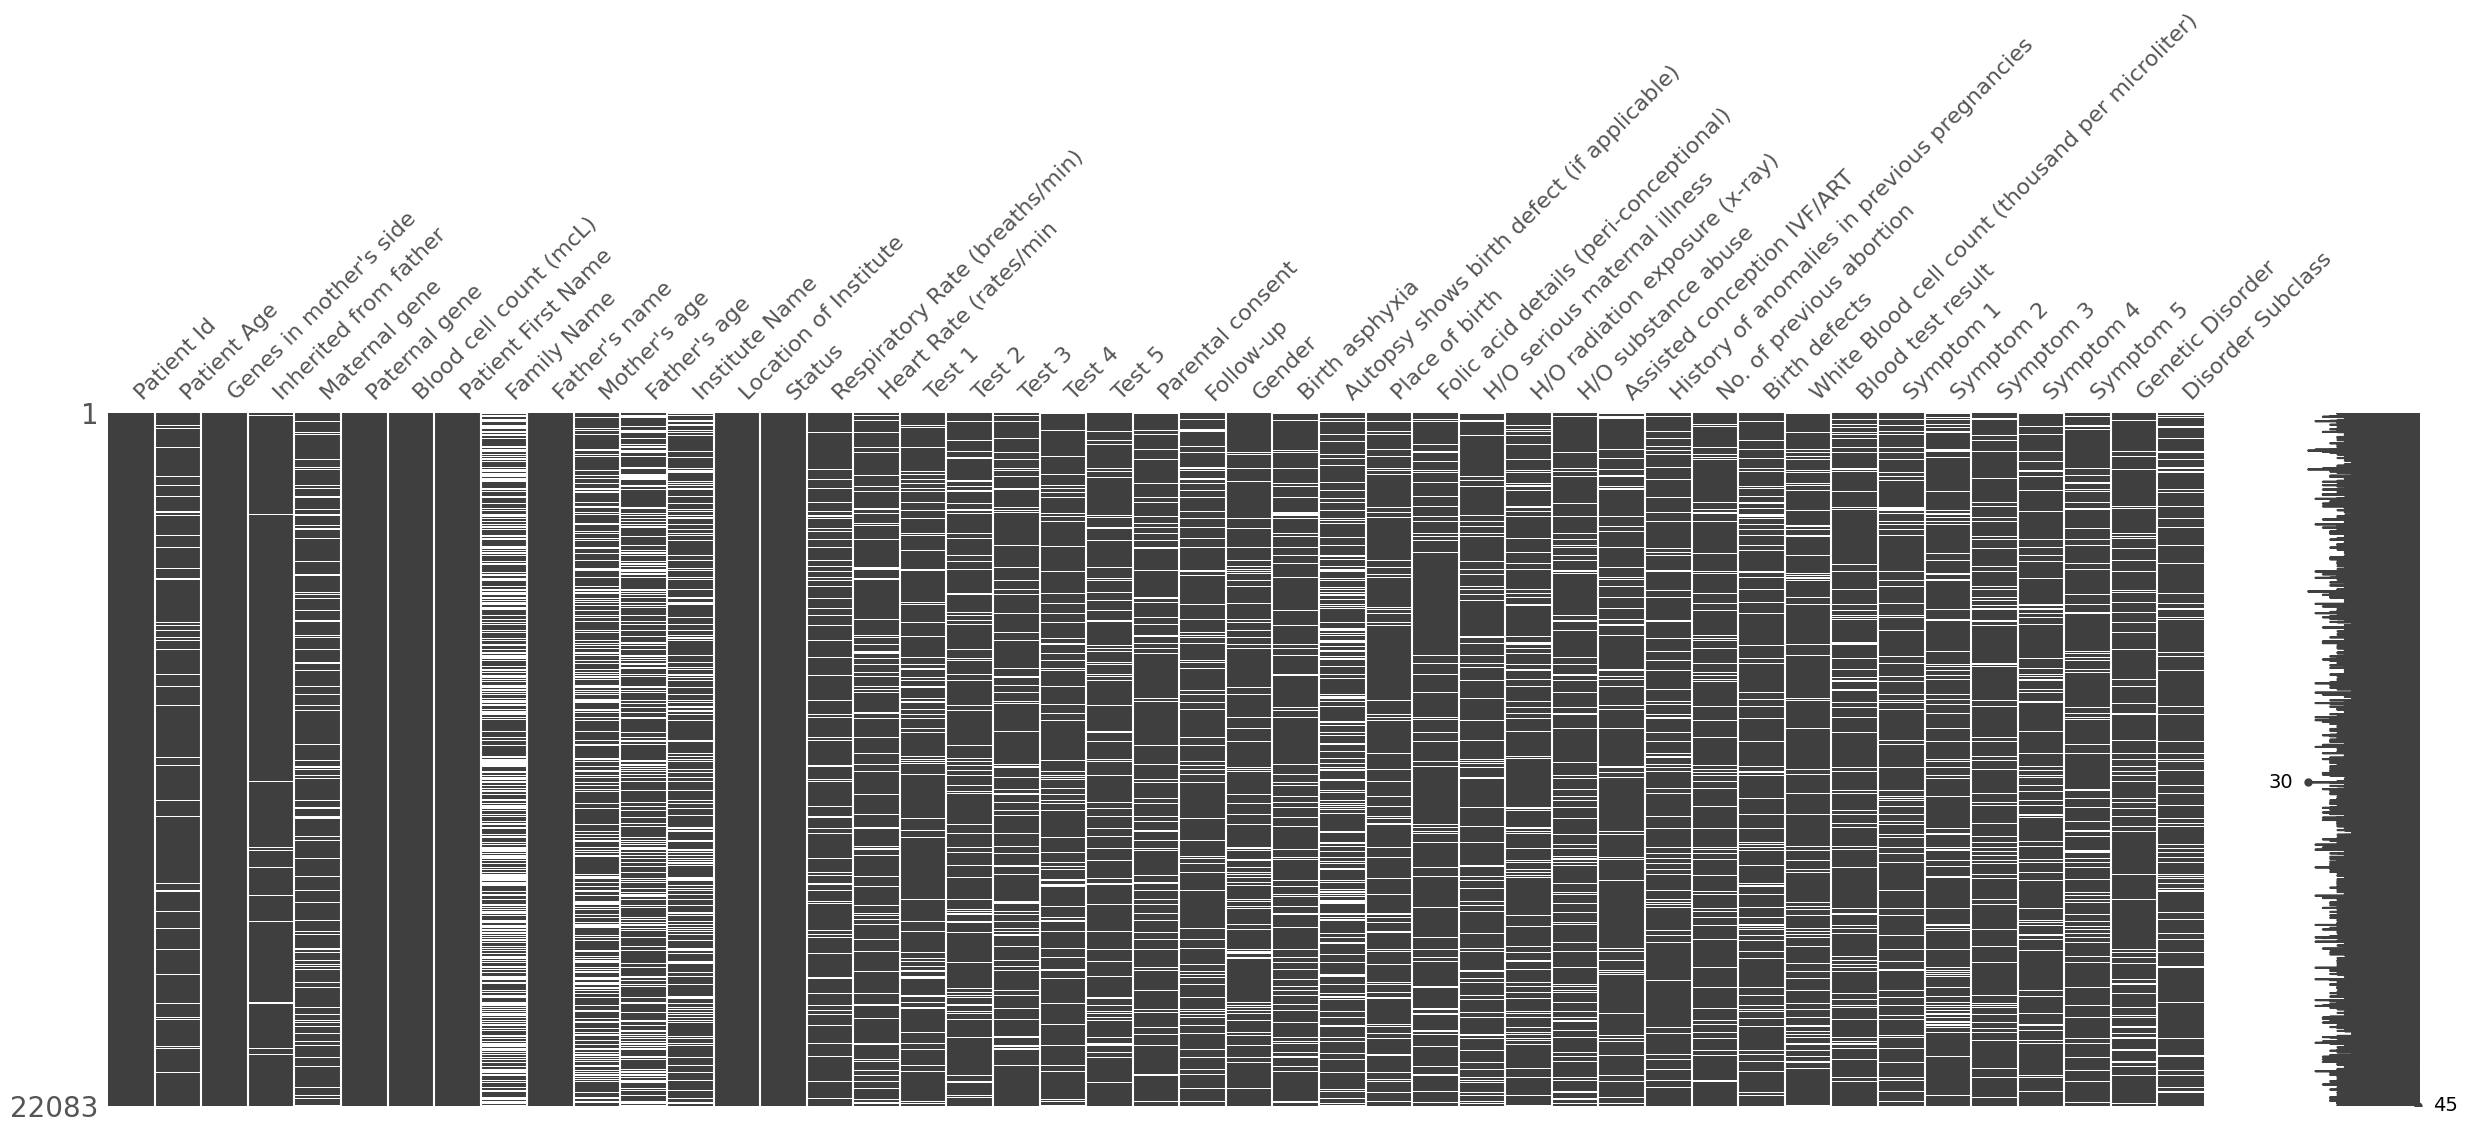

In [ ]:
missingno.matrix(train,figsize=(30,9))

In [ ]:
def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1)

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(train)

Your selected dataset has 45 columns and 22083 observations.

 There are 37 columns that have missing values.


,Missing Values,% of Total Values
Family Name,9691,43.9
Mother's age,6036,27.3
Father's age,5986,27.1
Institute Name,5106,23.1
Autopsy shows birth defect (if applicable),4392,19.9
Maternal gene,2810,12.7
Symptom 2,2222,10.1
H/O substance abuse,2195,9.9
Gender,2173,9.8
History of anomalies in previous pregnancies,2172,9.8


In [ ]:
train.dtypes

Patient Id                                           object
Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Patient First Name                                   object
Family Name                                          object
Father's name                                        object
Mother's age                                        float64
Father's age                                        float64
Institute Name                                       object
Location of Institute                                object
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                   

In [ ]:
train.head(3)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,NaN,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [ ]:
train['Patient Id'].duplicated().any()


False

In [ ]:
train['Patient Age'].describe()

count    20656.000000
mean         6.974148
std          4.319475
min          0.000000
25%          3.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: Patient Age, dtype: float64

In [ ]:
train['Patient Age'].isnull().any()

True

In [ ]:
train["Genes in mother's side"].unique()

array(['Yes', 'No'], dtype=object)

Genes in mother's side
Yes    13143
No      8940
Name: count, dtype: int64


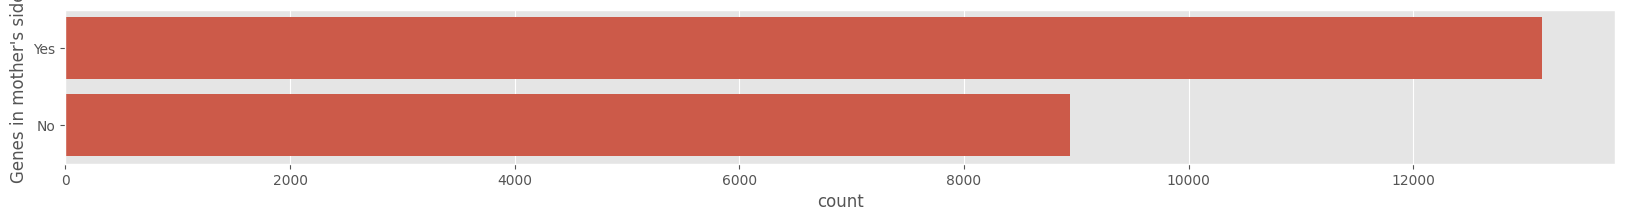

In [ ]:
# Is there any Gene Defect in the Mother?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Genes in mother's side",data= train)
#sns.countplot(x= "Genes in mother's side",data= train)             --> You can use this to get a vertical graph.

print(train["Genes in mother's side"].value_counts())             ##This will help us see the exact number along with the graph.

In [ ]:
## Unique Categories
train["Inherited from father"].unique()

array(['No', 'Yes', nan], dtype=object)

Inherited from father
No     13133
Yes     8644
Name: count, dtype: int64


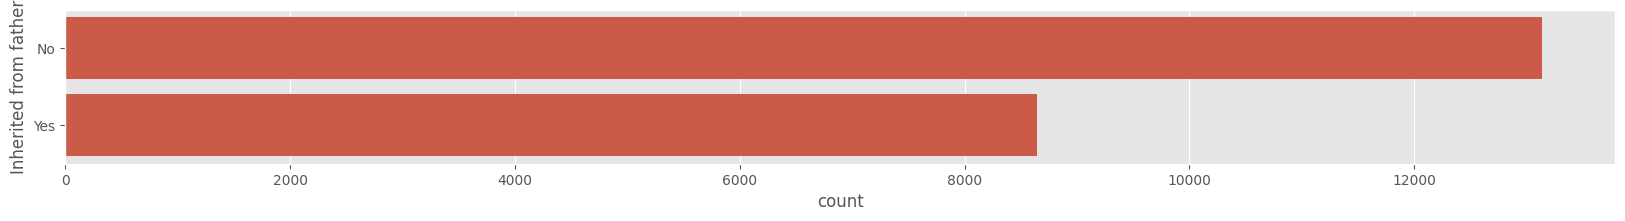

In [ ]:
# Is there any Gene Defect in the Father?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Inherited from father",data= train)

print(train["Inherited from father"].value_counts())

In [ ]:
## Unique Categories
train["Maternal gene"].unique()

array(['Yes', 'No', nan], dtype=object)

Maternal gene
Yes    10647
No      8626
Name: count, dtype: int64


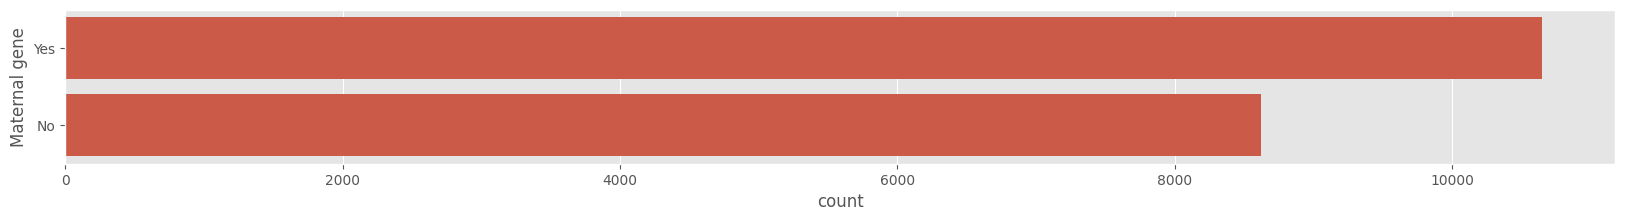

In [ ]:
# Is there any Gene Defect in the Mothers Side?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Maternal gene",data= train)

print(train["Maternal gene"].value_counts())

In [ ]:
## Unique Categories
train["Paternal gene"].unique()

array(['No', 'Yes'], dtype=object)

Paternal gene
No     12508
Yes     9575
Name: count, dtype: int64


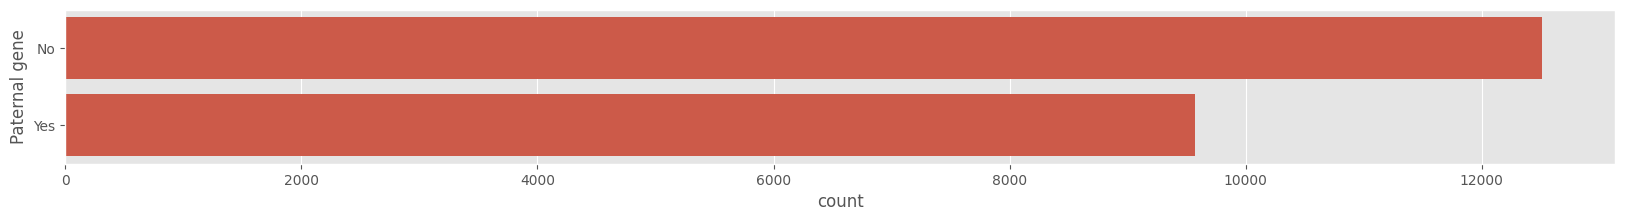

In [ ]:
# Is there any Gene Defect in the Fathers Side?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Paternal gene",data= train)

print(train["Paternal gene"].value_counts())

In [ ]:
## Basic Statistics
train['Blood cell count (mcL)'].describe()## Missing Values


count    22083.000000
mean         4.898871
std          0.199663
min          4.092727
25%          4.763109
50%          4.899399
75%          5.033830
max          5.609829
Name: Blood cell count (mcL), dtype: float64

In [ ]:
## Missing Values
train['Blood cell count (mcL)'].isnull().any()

False

<Axes: xlabel='Blood cell count (mcL)', ylabel='Density'>

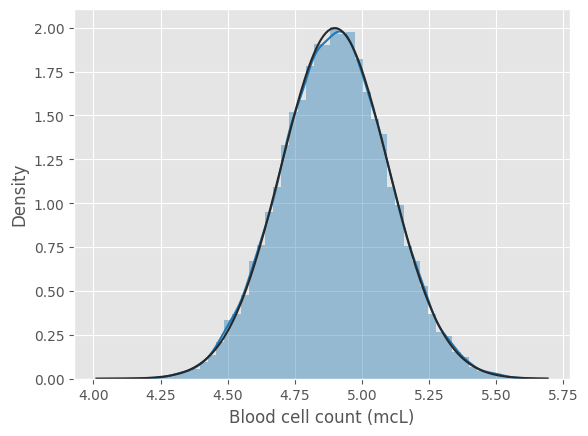

In [ ]:
## Distribution of the Feature
sns.distplot(train['Blood cell count (mcL)'], fit= norm, color= 'tab:blue')

<Axes: xlabel='Blood cell count (mcL)'>

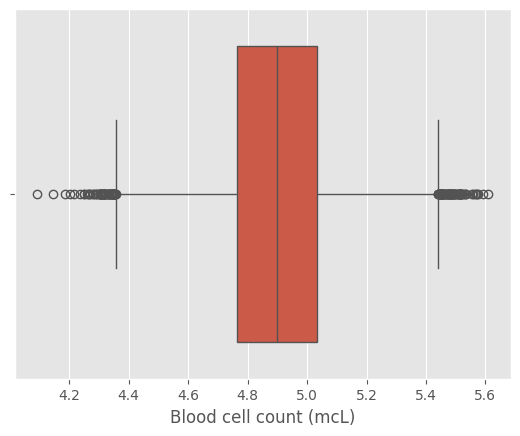

In [ ]:
## Checking For Outliers
sns.boxplot(x= train['Blood cell count (mcL)'])

In [ ]:
train["Mother's age"].isnull().any()

True

In [ ]:
## Basic Statistics
train["Mother's age"].describe()

count    16047.000000
mean        34.526454
std          9.852598
min         18.000000
25%         26.000000
50%         35.000000
75%         43.000000
max         51.000000
Name: Mother's age, dtype: float64

In [ ]:
## Missing Values
train["Father's age"].isnull().any()

True

In [ ]:

## Basic Statistics
train["Father's age"].describe()

count    16097.000000
mean        41.972852
std         13.035501
min         20.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         64.000000
Name: Father's age, dtype: float64

In [ ]:
## Unique Categories
train["Status"].unique()

array(['Alive', 'Deceased'], dtype=object)

Status
Alive       11083
Deceased    11000
Name: count, dtype: int64


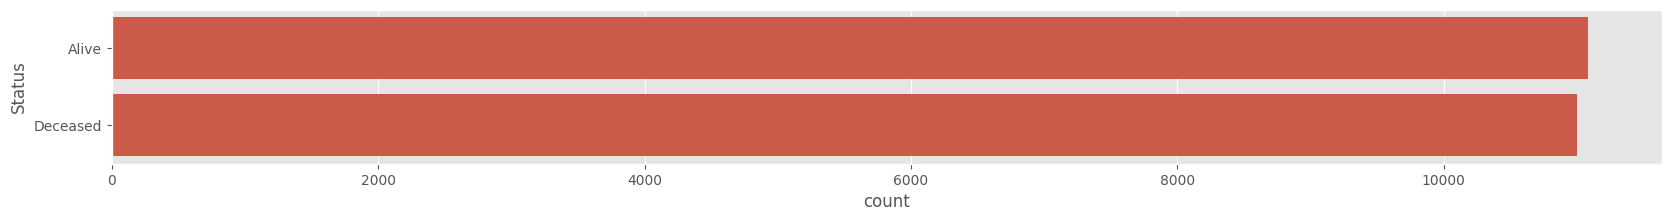

In [ ]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Status",data= train)

print(train["Status"].value_counts())

In [ ]:
## Unique Categories
train["Respiratory Rate (breaths/min)"].unique()


array(['Normal (30-60)', 'Tachypnea', nan], dtype=object)

Respiratory Rate (breaths/min)
Normal (30-60)    10065
Tachypnea          9869
Name: count, dtype: int64


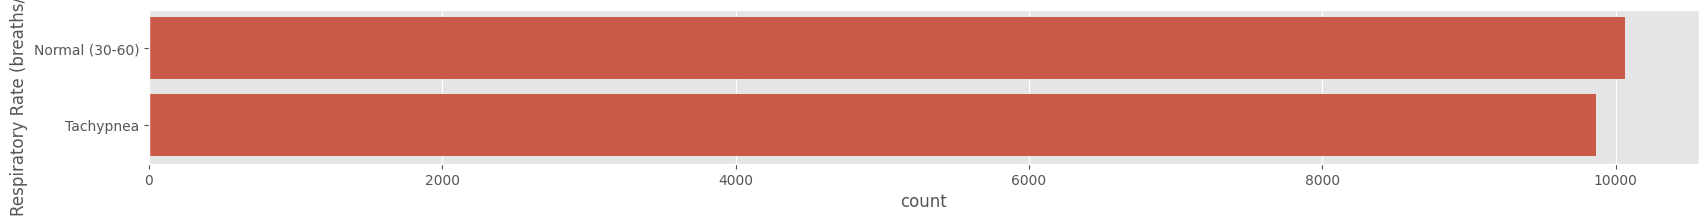

In [ ]:
# Understanding the Respiratory Rate of Patients
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Respiratory Rate (breaths/min)",data= train)

print(train["Respiratory Rate (breaths/min)"].value_counts())

In [ ]:
## Unique Categories
train["Heart Rate (rates/min"].unique()

array(['Normal', 'Tachycardia', nan], dtype=object)

Heart Rate (rates/min
Normal         10187
Tachycardia     9783
Name: count, dtype: int64


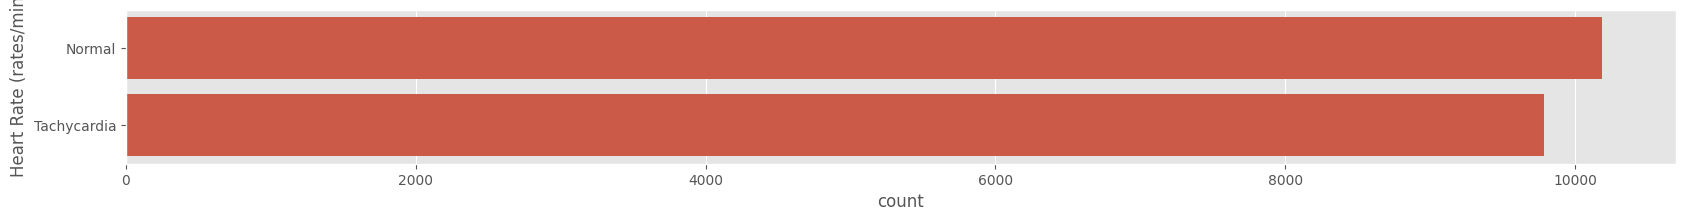

In [ ]:
# Understanding the Heart Rate of Patients
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Heart Rate (rates/min",data= train)

print(train["Heart Rate (rates/min"].value_counts())

In [ ]:
print(f"Uniqueness for Test 1 is: {train['Test 1'].unique()}")
print()
print(f"Uniqueness for Test 2 is: {train['Test 2'].unique()}")
print()
print(f"Uniqueness for Test 3 is: {train['Test 3'].unique()}")
print()
print(f"Uniqueness for Test 4 is: {train['Test 4'].unique()}")
print()
print(f"Uniqueness for Test 5 is: {train['Test 5'].unique()}")

Uniqueness for Test 1 is: [ 0. nan]

Uniqueness for Test 2 is: [nan  0.]

Uniqueness for Test 3 is: [nan  0.]

Uniqueness for Test 4 is: [ 1. nan]

Uniqueness for Test 5 is: [ 0. nan]


In [ ]:
print(f"Count for Test 1 is: {train['Test 1'].value_counts()}")
print()
print(f"Count for Test 2 is: {train['Test 2'].value_counts()}")
print()
print(f"Count for Test 3 is: {train['Test 3'].value_counts()}")
print()
print(f"Count for Test 4 is: {train['Test 4'].value_counts()}")
print()
print(f"Count for Test 5 is: {train['Test 5'].value_counts()}")

Count for Test 1 is: Test 1
0.0    19956
Name: count, dtype: int64

Count for Test 2 is: Test 2
0.0    19931
Name: count, dtype: int64

Count for Test 3 is: Test 3
0.0    19936
Name: count, dtype: int64

Count for Test 4 is: Test 4
1.0    19943
Name: count, dtype: int64

Count for Test 5 is: Test 5
0.0    19913
Name: count, dtype: int64


In [ ]:
## Unique Categories
train["Parental consent"].unique()

array(['Yes', nan], dtype=object)

In [ ]:
## Count of Categories
train["Parental consent"].value_counts()

Parental consent
Yes    19958
Name: count, dtype: int64

In [ ]:
## Unique Categories
train["Follow-up"].unique()

array(['High', 'Low', nan], dtype=object)

Follow-up
Low     10040
High     9877
Name: count, dtype: int64


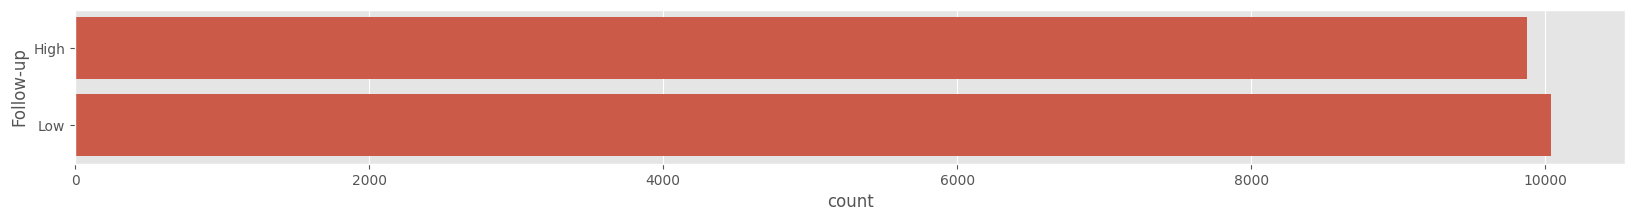

In [ ]:
# Understanding the Risk Cases
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Follow-up",data= train)

print(train["Follow-up"].value_counts())

In [ ]:
train["Gender"].unique()

array([nan, 'Male', 'Female', 'Ambiguous'], dtype=object)

Gender
Ambiguous    6695
Male         6666
Female       6549
Name: count, dtype: int64


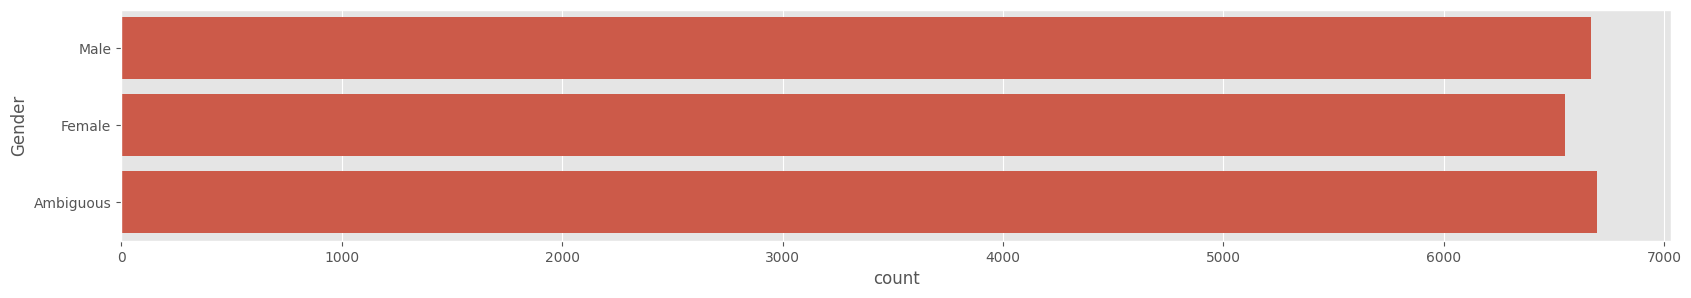

In [ ]:
# Understanding the Gender distribution
fig = plt.figure(figsize=(20,3))
sns.countplot(y= "Gender",data= train)

print(train["Gender"].value_counts())

In [ ]:
## Unique Categories
train["Birth asphyxia"].unique()

array([nan, 'No', 'No record', 'Not available', 'Yes'], dtype=object)

Birth asphyxia
Yes              5106
No record        5008
Not available    4986
No               4844
Name: count, dtype: int64


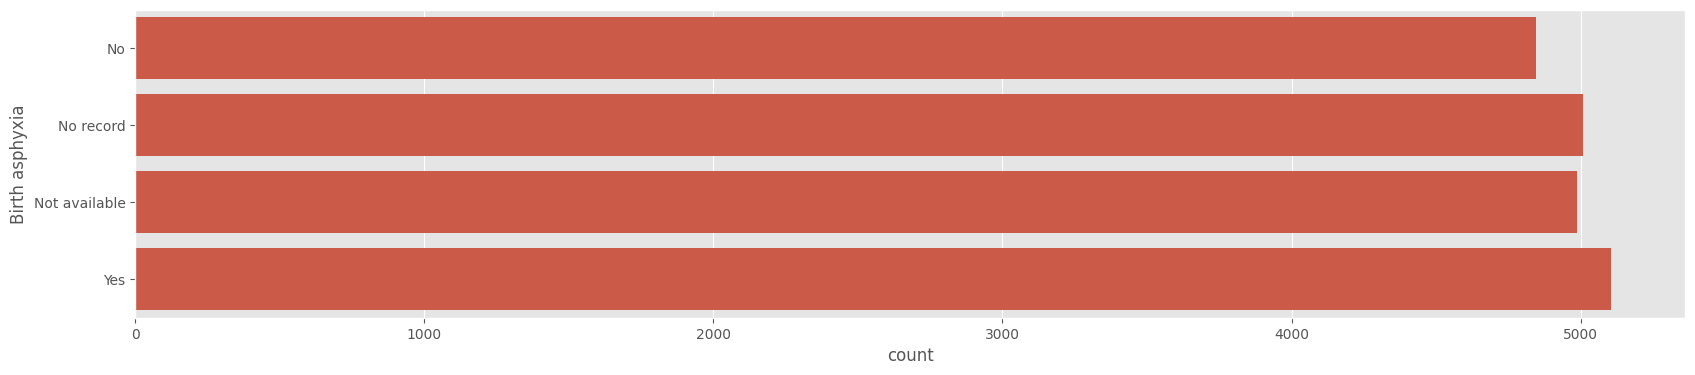

In [ ]:
# Understanding Birth asphyxia distribution
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Birth asphyxia",data= train)

print(train["Birth asphyxia"].value_counts())

In [ ]:
## Unique Categories
train["Autopsy shows birth defect (if applicable)"].unique()

array(['Not applicable', nan, 'No', 'Yes'], dtype=object)

Autopsy shows birth defect (if applicable)
Not applicable    11083
Yes                3383
No                 3225
Name: count, dtype: int64


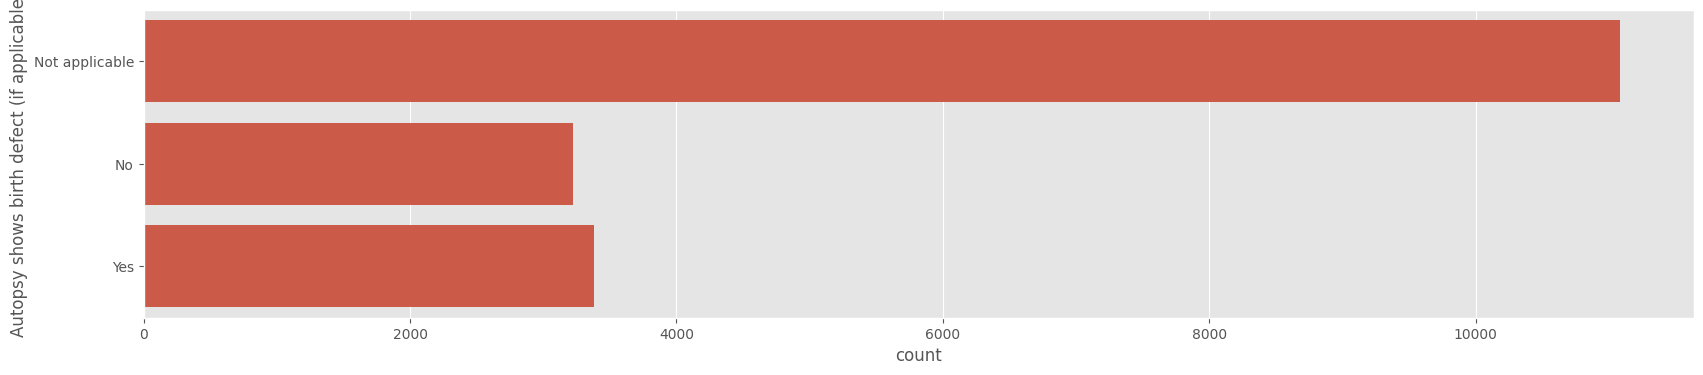

In [ ]:
# Understanding Birth defect distribution
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Autopsy shows birth defect (if applicable)",data= train)

print(train["Autopsy shows birth defect (if applicable)"].value_counts())

In [ ]:
## Checking the Status of Patients with Missing Autopsy Reports
X = train[train["Autopsy shows birth defect (if applicable)"].isnull() == True]
X['Status'].value_counts()

Status
Deceased    4392
Name: count, dtype: int64

In [ ]:
## Unique Categories
train["Folic acid details (peri-conceptional)"].unique()

array(['No', 'Yes', nan], dtype=object)

Folic acid details (peri-conceptional)
Yes    10087
No      9879
Name: count, dtype: int64


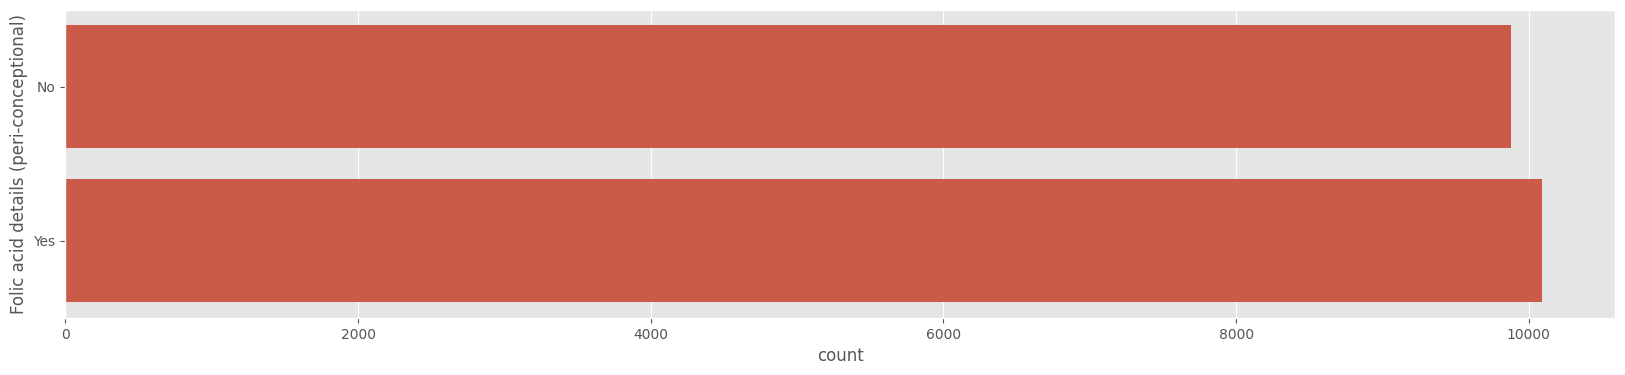

In [ ]:
# Understanding Folic acid details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Folic acid details (peri-conceptional)",data= train)

print(train["Folic acid details (peri-conceptional)"].value_counts())

In [ ]:
## Unique Categories
train["H/O radiation exposure (x-ray)"].unique()

array(['No', 'Not applicable', 'Yes', '-', nan], dtype=object)

H/O radiation exposure (x-ray)
Not applicable    5029
No                5005
Yes               4980
-                 4916
Name: count, dtype: int64


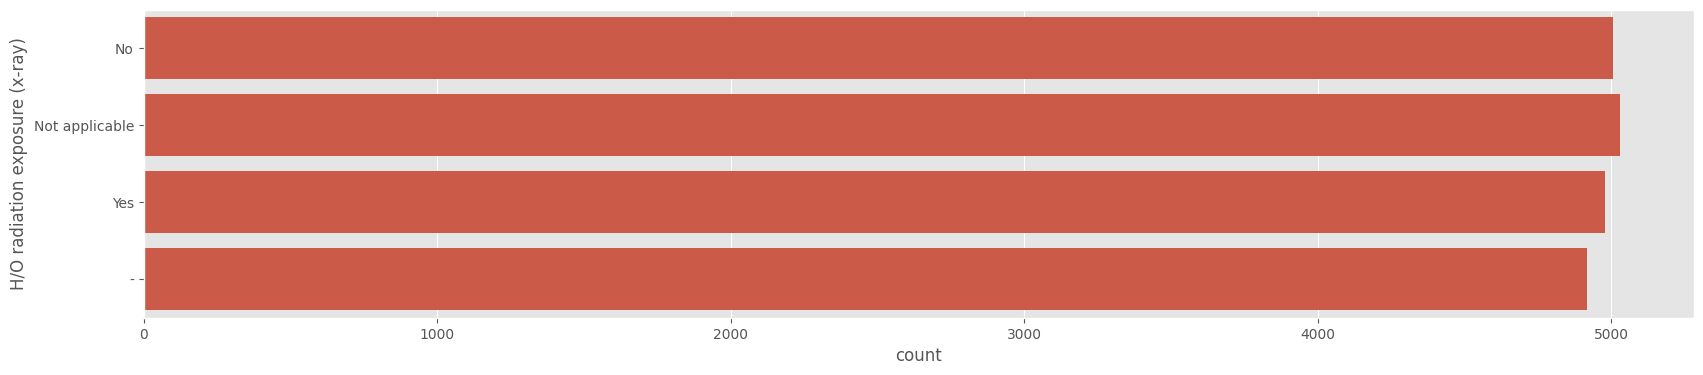

In [ ]:
# Understanding Radiation Exposure details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "H/O radiation exposure (x-ray)",data= train)

print(train["H/O radiation exposure (x-ray)"].value_counts())

In [ ]:
## Unique Categories
train["H/O substance abuse"].unique()

array(['No', 'Not applicable', nan, '-', 'Yes'], dtype=object)

H/O substance abuse
-                 5042
No                5033
Yes               4975
Not applicable    4838
Name: count, dtype: int64


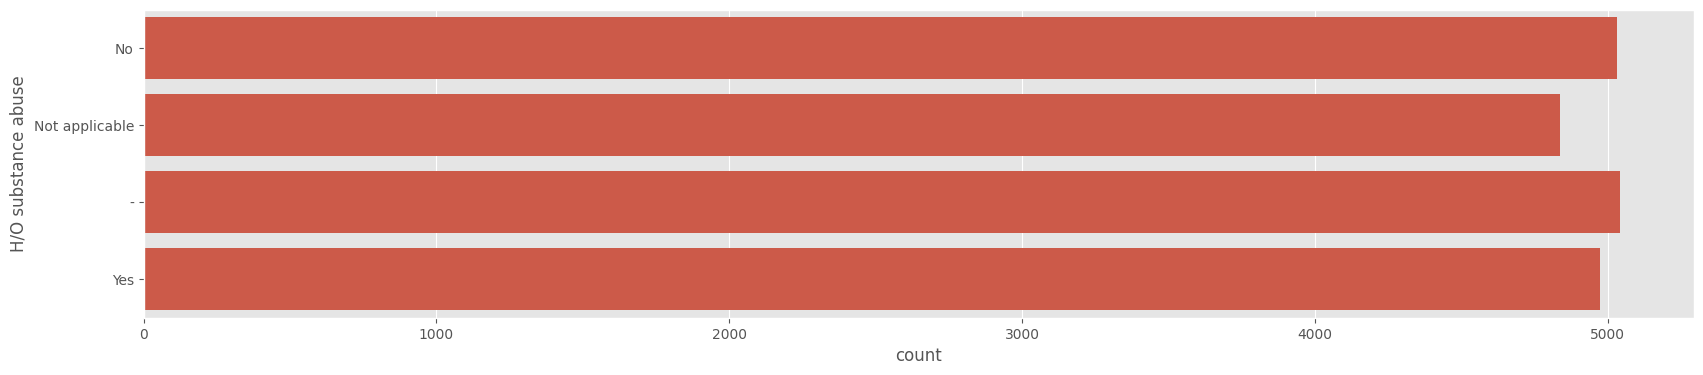

In [ ]:
# Understanding Substance Abuse details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "H/O substance abuse",data= train)

print(train["H/O substance abuse"].value_counts())

In [ ]:
## Unique Categories
train["Autopsy shows birth defect (if applicable)"].unique()

array(['Not applicable', nan, 'No', 'Yes'], dtype=object)

Autopsy shows birth defect (if applicable)
Not applicable    11083
Yes                3383
No                 3225
Name: count, dtype: int64


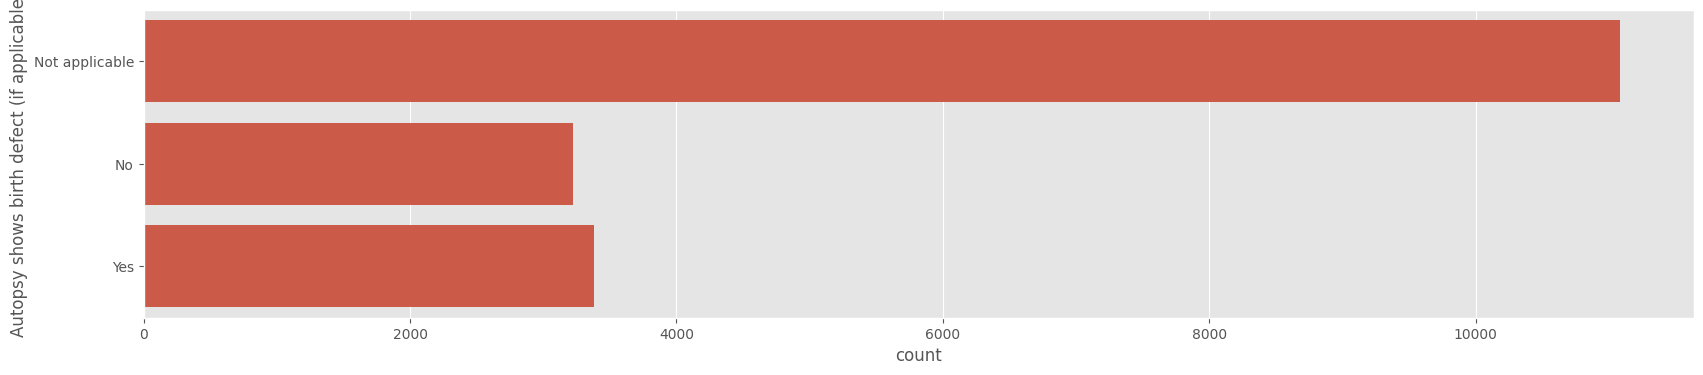

In [ ]:
# Understanding Birth defect distribution
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Autopsy shows birth defect (if applicable)",data= train)

print(train["Autopsy shows birth defect (if applicable)"].value_counts())

In [ ]:

## Checking the Status of Patients with Missing Autopsy Reports
X = train[train["Autopsy shows birth defect (if applicable)"].isnull() == True]
X['Status'].value_counts()

Status
Deceased    4392
Name: count, dtype: int64

In [ ]:
## Unique Categories
train["Folic acid details (peri-conceptional)"].unique()

array(['No', 'Yes', nan], dtype=object)

Folic acid details (peri-conceptional)
Yes    10087
No      9879
Name: count, dtype: int64


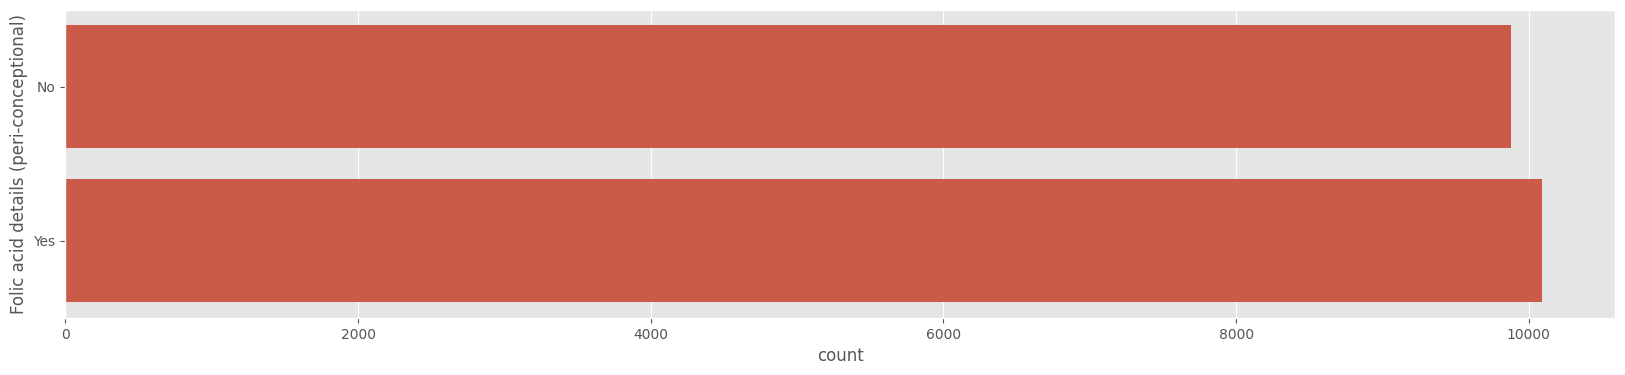

In [ ]:
# Understanding Folic acid details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Folic acid details (peri-conceptional)",data= train)

print(train["Folic acid details (peri-conceptional)"].value_counts())

In [ ]:
## Unique Categories
train["H/O radiation exposure (x-ray)"].unique()


array(['No', 'Not applicable', 'Yes', '-', nan], dtype=object)

H/O radiation exposure (x-ray)
Not applicable    5029
No                5005
Yes               4980
-                 4916
Name: count, dtype: int64


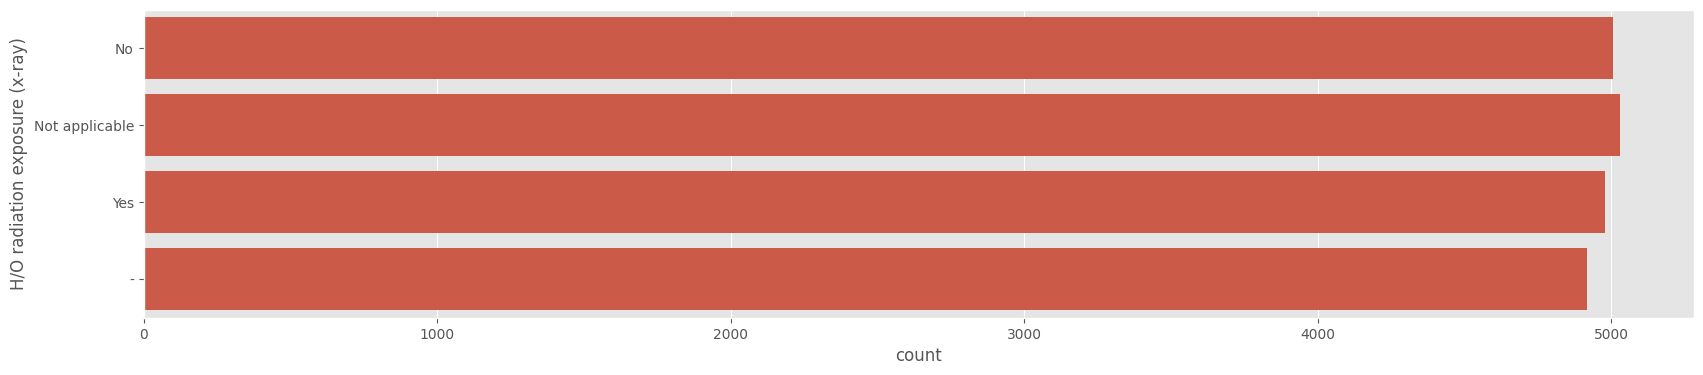

In [ ]:
# Understanding Radiation Exposure details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "H/O radiation exposure (x-ray)",data= train)

print(train["H/O radiation exposure (x-ray)"].value_counts())

In [ ]:
## Unique Categories
train["H/O substance abuse"].unique()

array(['No', 'Not applicable', nan, '-', 'Yes'], dtype=object)

H/O substance abuse
-                 5042
No                5033
Yes               4975
Not applicable    4838
Name: count, dtype: int64


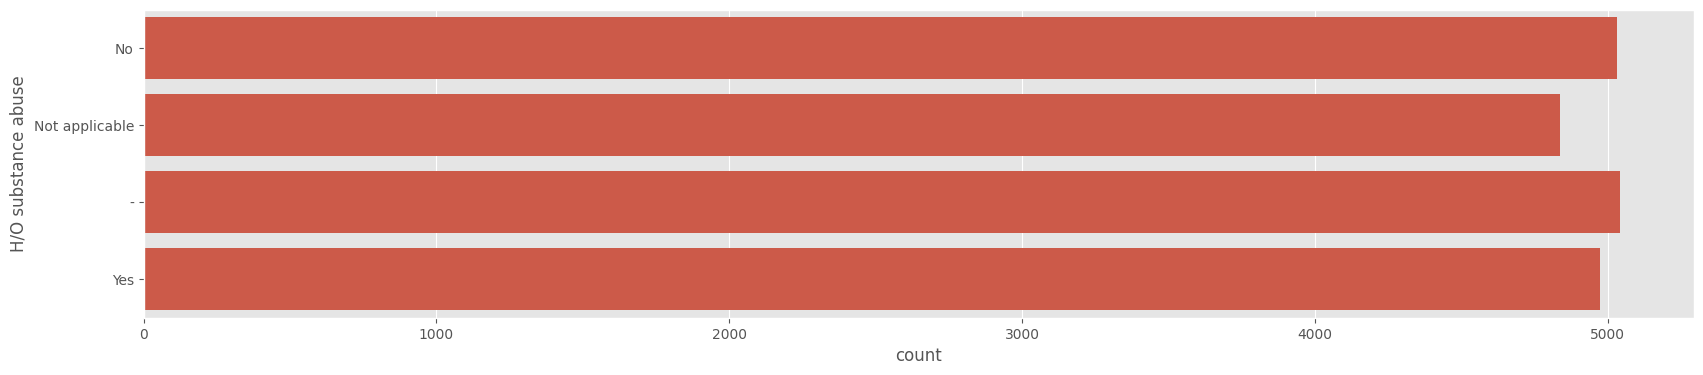

In [ ]:
# Understanding Substance Abuse details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "H/O substance abuse",data= train)

print(train["H/O substance abuse"].value_counts())

In [ ]:
## Unique Categories
train["Assisted conception IVF/ART"].unique()

array(['No', 'Yes', nan], dtype=object)

Assisted conception IVF/ART
Yes    10012
No      9949
Name: count, dtype: int64


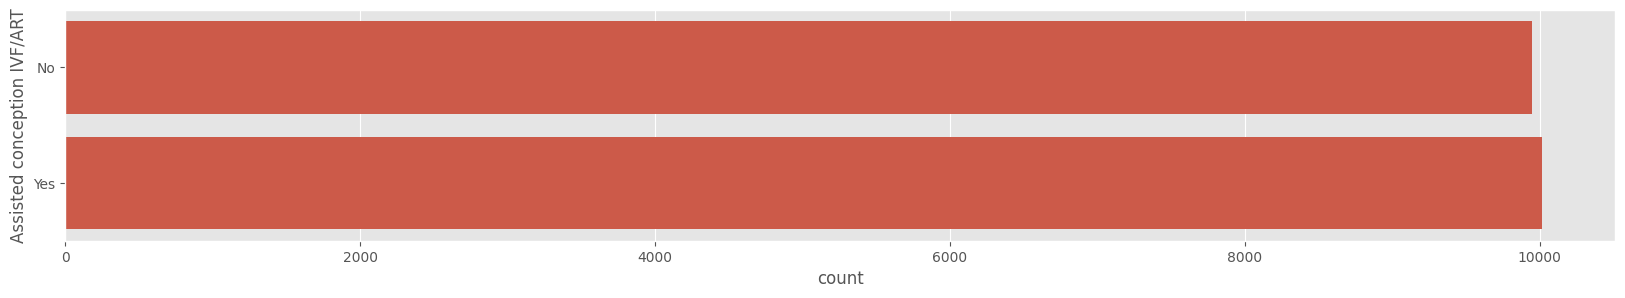

In [ ]:
# Understanding Assisted Conception details
fig = plt.figure(figsize=(20,3))
sns.countplot(y= "Assisted conception IVF/ART",data= train)

print(train["Assisted conception IVF/ART"].value_counts())

In [ ]:
## Unique Categories
train["History of anomalies in previous pregnancies"].unique()

array(['Yes', 'No', nan], dtype=object)

History of anomalies in previous pregnancies
Yes    10082
No      9829
Name: count, dtype: int64


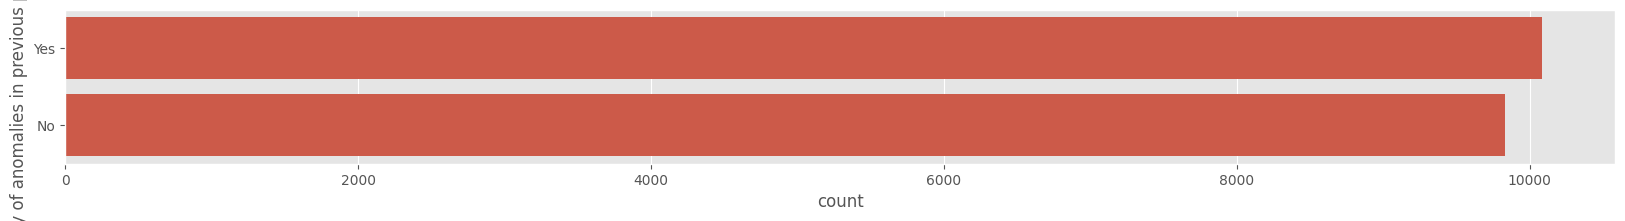

In [ ]:
# Understanding Anomalies in Previous Pregnancies details
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "History of anomalies in previous pregnancies",data= train)

print(train["History of anomalies in previous pregnancies"].value_counts())

In [ ]:

## Unique Categories
train["No. of previous abortion"].unique()

array([nan,  4.,  1.,  0.,  3.,  2.])

No. of previous abortion
2.0    4117
4.0    4005
0.0    3964
1.0    3928
3.0    3907
Name: count, dtype: int64


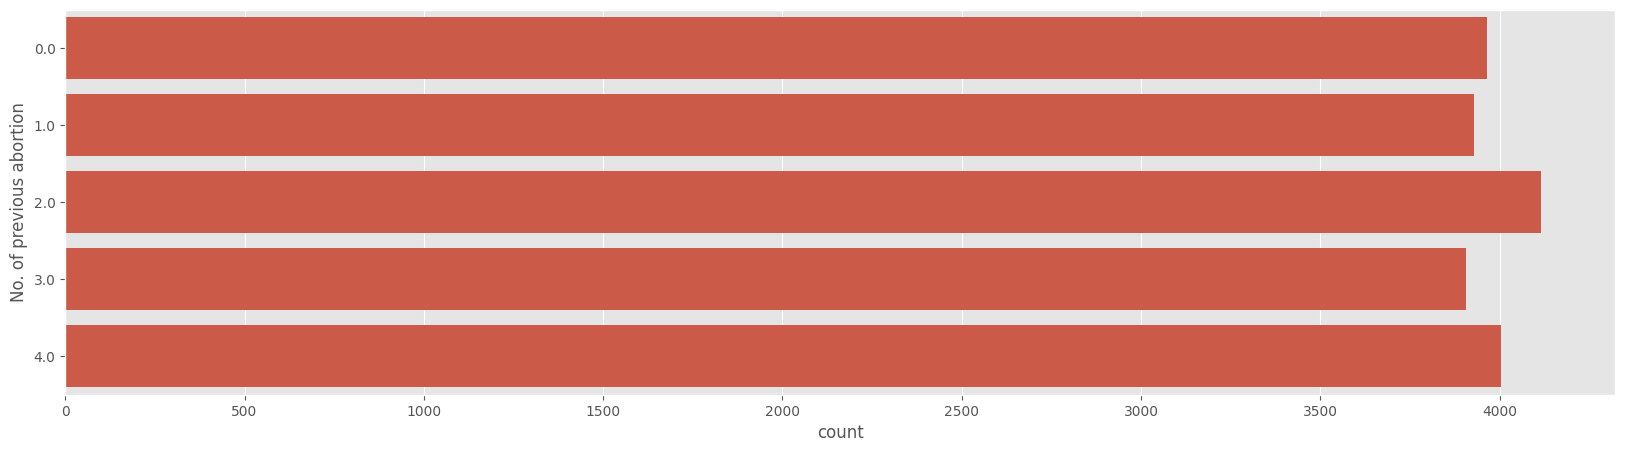

In [ ]:
# Understanding Abortion details
fig = plt.figure(figsize=(20,5))
sns.countplot(y= "No. of previous abortion",data= train)

print(train["No. of previous abortion"].value_counts())

In [ ]:
## Unique Categories
train["Birth defects"].unique()

array([nan, 'Multiple', 'Singular'], dtype=object)

Birth defects
Singular    9977
Multiple    9952
Name: count, dtype: int64


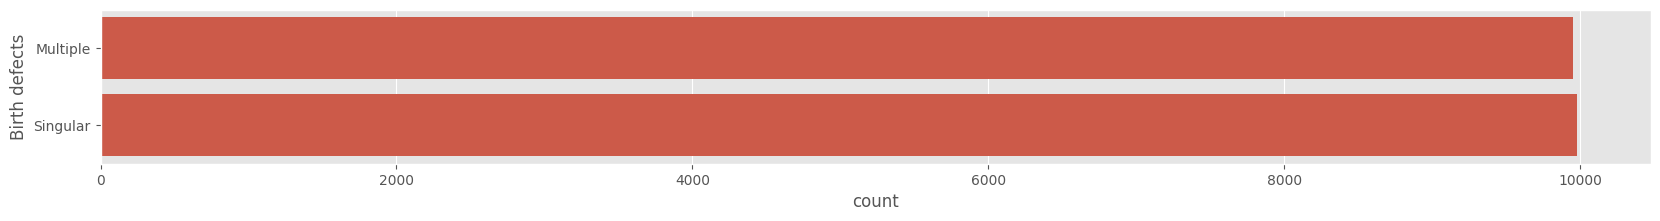

In [ ]:
# Understanding Birth Defects details
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Birth defects",data= train)

print(train["Birth defects"].value_counts())

In [ ]:
## Missing Values
train["White Blood cell count (thousand per microliter)"].isnull().any()

True

In [ ]:
## Basic Statistics
train['White Blood cell count (thousand per microliter)'].describe()

count    19935.000000
mean         7.486224
std          2.653393
min          3.000000
25%          5.424703
50%          7.477132
75%          9.526152
max         12.000000
Name: White Blood cell count (thousand per microliter), dtype: float64

In [ ]:
## Unique Categories
train["Blood test result"].unique()

array([nan, 'normal', 'inconclusive', 'slightly abnormal', 'abnormal'],
      dtype=object)

Blood test result
slightly abnormal    5128
normal               4954
inconclusive         4952
abnormal             4904
Name: count, dtype: int64


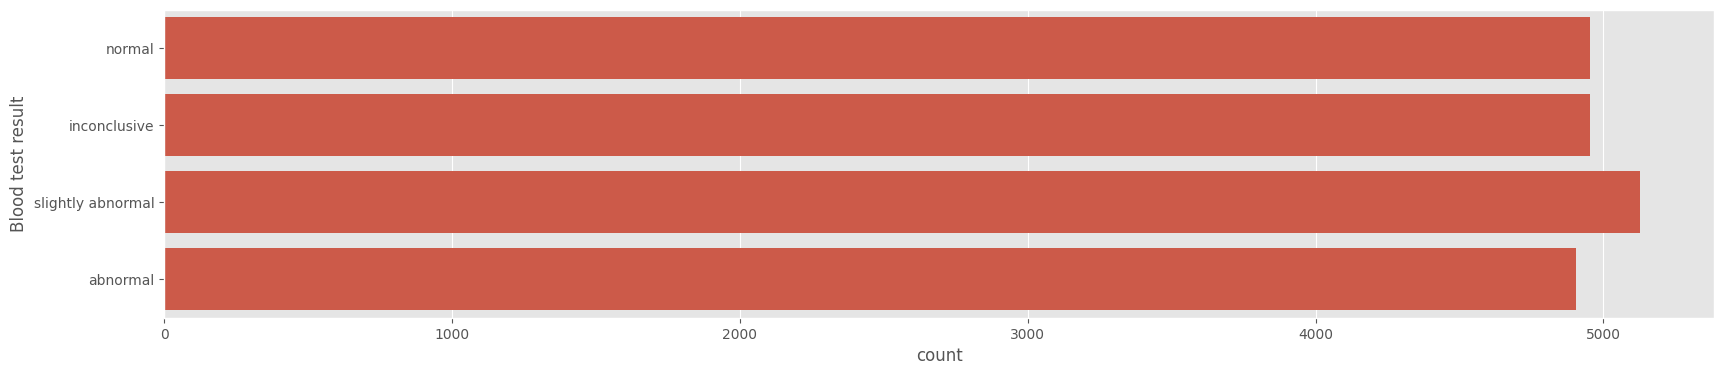

In [ ]:
# Understanding Blood Test Result details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Blood test result",data= train)

print(train["Blood test result"].value_counts())

In [ ]:
print(f"Uniqueness for Symptom 1 is: {train['Symptom 1'].unique()}")
print()
print(f"Uniqueness for Symptom 2 is: {train['Symptom 2'].unique()}")
print()
print(f"Uniqueness for Symptom 3 is: {train['Symptom 3'].unique()}")
print()
print(f"Uniqueness for Symptom 4 is: {train['Symptom 4'].unique()}")
print()
print(f"Uniqueness for Symptom 5 is: {train['Symptom 5'].unique()}")

Uniqueness for Symptom 1 is: [ 1.  0. nan]

Uniqueness for Symptom 2 is: [ 1. nan  0.]

Uniqueness for Symptom 3 is: [ 1.  0. nan]

Uniqueness for Symptom 4 is: [ 1.  0. nan]

Uniqueness for Symptom 5 is: [ 1.  0. nan]


In [ ]:
print(f"Count for Symptom 1 is: {train['Symptom 1'].value_counts()}")
print()
print(f"Count for Symptom 2 is: {train['Symptom 2'].value_counts()}")
print()
print(f"Count for Symptom 3 is: {train['Symptom 3'].value_counts()}")
print()
print(f"Count for Symptom 4 is: {train['Symptom 4'].value_counts()}")
print()
print(f"Count for Symptom 5 is: {train['Symptom 5'].value_counts()}")

Count for Symptom 1 is: Symptom 1
1.0    11807
0.0     8121
Name: count, dtype: int64

Count for Symptom 2 is: Symptom 2
1.0    10961
0.0     8900
Name: count, dtype: int64

Count for Symptom 3 is: Symptom 3
1.0    10715
0.0     9267
Name: count, dtype: int64

Count for Symptom 4 is: Symptom 4
0.0    10030
1.0     9940
Name: count, dtype: int64

Count for Symptom 5 is: Symptom 5
0.0    10724
1.0     9206
Name: count, dtype: int64


In [ ]:
## Unique Categories
train["Genetic Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders', nan,
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

Genetic Disorder
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: count, dtype: int64


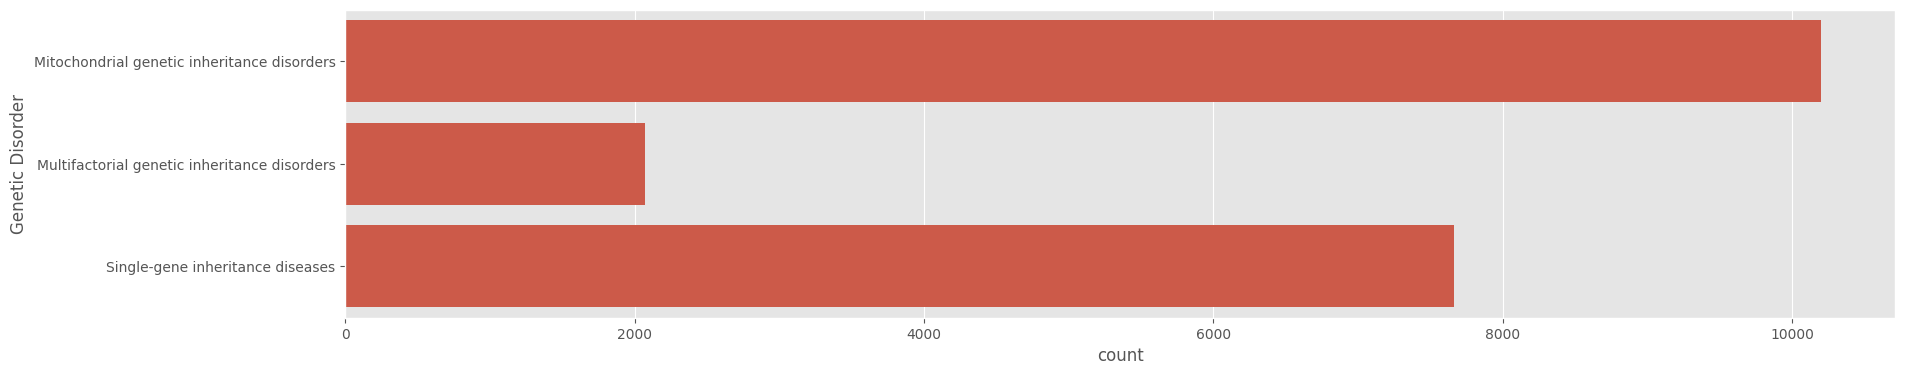

In [ ]:
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Genetic Disorder",data= train)

print(train["Genetic Disorder"].value_counts())

In [ ]:
## Unique Categories
train["Disorder Subclass"].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', nan, "Alzheimer's"],
      dtype=object)

Disorder Subclass
Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: count, dtype: int64


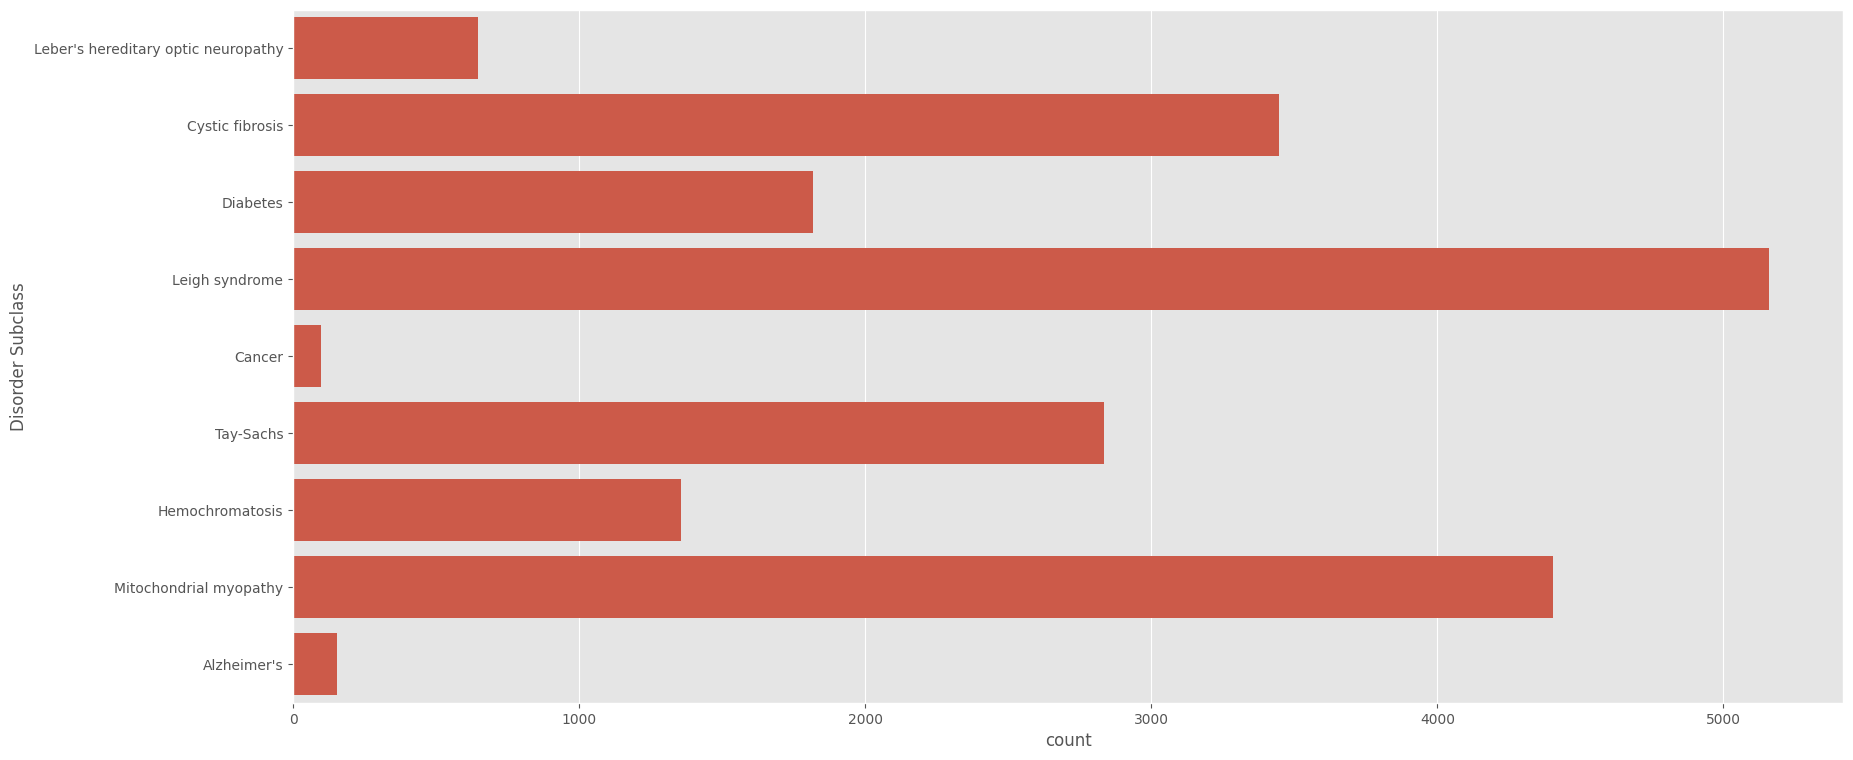

In [ ]:
# Understanding Disorder Subclass details
fig = plt.figure(figsize=(20,9))
sns.countplot(y= "Disorder Subclass",data= train)

print(train["Disorder Subclass"].value_counts())

In [ ]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

## Statistical Analysis
from scipy import stats
from scipy.stats import norm,skew

# Display all Columns
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path = r"/content/drive/MyDrive/Genetic_Disorder/dataset/train (2).csv"
test_path = r"/content/drive/MyDrive/Genetic_Disorder/dataset/test (1).csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:

## Understanding the Division of Genetic Disorders.
table1 = pd.pivot_table(train, index= ['Genetic Disorder', 'Disorder Subclass'], values= 'Patient Age', aggfunc= np.mean)
table1

Patient Age
Genetic Disorder                             Disorder Subclass                               
Mitochondrial genetic inheritance disorders  Leber's hereditary optic neuropathy     6.748644
                                             Leigh syndrome                          6.946026
                                             Mitochondrial myopathy                  6.955514
Multifactorial genetic inheritance disorders Alzheimer's                             6.358779
                                             Cancer                                  7.616279
                                             Diabetes                                6.907623
Single-gene inheritance diseases             Cystic fibrosis                         6.925110
                                             Hemochromatosis                         6.856771
                                             Tay-Sachs                               7.096241

In [ ]:
for i in range(0,22083):
    if (train['Genetic Disorder'].isnull()[i] == True):
        if (train['Disorder Subclass'][i] == "Leber's hereditary optic neuropathy"):
          train['Genetic Disorder'][i] = 'Mitochondrial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Leigh syndrome'):
          train['Genetic Disorder'][i] = 'Mitochondrial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Mitochondrial myopathy'):
          train['Genetic Disorder'][i] = 'Mitochondrial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == "Alzheimer's"):
          train['Genetic Disorder'][i] = 'Multifactorial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Cancer'):
          train['Genetic Disorder'][i] = 'Multifactorial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Diabetes'):
          train['Genetic Disorder'][i] = 'Multifactorial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == "Cystic fibrosis"):
          train['Genetic Disorder'][i] = 'Single-gene inheritance diseases'
        elif (train['Disorder Subclass'][i] == 'Hemochromatosis'):
          train['Genetic Disorder'][i] = 'Single-gene inheritance diseases'
        elif (train['Disorder Subclass'][i] == 'Tay-Sachs'):
          train['Genetic Disorder'][i] = 'Single-gene inheritance diseases'
        else:
          pass
    else:
      continue


In [ ]:
## Understanding the Division of Genetic Disorders.
table2 = pd.pivot_table(train, index= ['Genetic Disorder', 'Disorder Subclass'], values= 'Patient Id', aggfunc= 'count')
table2

Patient Id
Genetic Disorder                             Disorder Subclass                              
Mitochondrial genetic inheritance disorders  Leber's hereditary optic neuropathy         648
                                             Leigh syndrome                             5160
                                             Mitochondrial myopathy                     4405
Multifactorial genetic inheritance disorders Alzheimer's                                 152
                                             Cancer                                       97
                                             Diabetes                                   1817
Single-gene inheritance diseases             Cystic fibrosis                            3448
                                             Hemochromatosis                            1355
                                             Tay-Sachs                                  2833

In [ ]:
for i in range(0,22083):
    if (train['Disorder Subclass'].isnull()[i] == True):
        if (train['Genetic Disorder'][i] == "Mitochondrial genetic inheritance disorders"):
          train['Disorder Subclass'][i] = 'Leigh syndrome'
        elif (train['Genetic Disorder'][i] == "Multifactorial genetic inheritance disorders"):
          train['Disorder Subclass'][i] = 'Diabetes'
        elif (train['Genetic Disorder'][i] == "Single-gene inheritance diseases"):
          train['Disorder Subclass'][i] = 'Cystic fibrosis'
        else:
          pass
    else:
      continue

In [ ]:
print(f'The Missing Values in Disorder Subclass Column is: {train["Disorder Subclass"].isnull().sum()}')
print(f'The Missing Values in Genetic Disorder Column is: {train["Genetic Disorder"].isnull().sum()}')


The Missing Values in Disorder Subclass Column is: 278
The Missing Values in Genetic Disorder Column is: 278


In [ ]:
## Dropping the Missing Values from the Target Variables.
train.dropna(subset=['Genetic Disorder', "Disorder Subclass"], inplace= True)

In [ ]:
train.shape

(21805, 45)

In [ ]:
## Proper Indexing
train.insert(0, '', range(0, 0 + len(train)))
train.set_index('', inplace= True)

In [ ]:
## Dropping all Unnecessary Columns
train.drop(columns= ['Patient Id', 'Place of birth', 'H/O serious maternal illness', 'Patient First Name', 'Family Name', "Father's name",
                     'Institute Name', 'Location of Institute'], inplace= True)

test.drop(columns= ['Patient Id', 'Place of birth', 'H/O serious maternal illness', 'Patient First Name', 'Family Name', "Father's name",
                     'Institute Name', 'Location of Institute'], inplace= True)

In [ ]:
train.shape

(21805, 37)

In [ ]:

train['Patient Age'].describe()

count    20397.000000
mean         6.972349
std          4.317753
min          0.000000
25%          3.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: Patient Age, dtype: float64

In [ ]:
train['Patient Age'].fillna(round(train['Patient Age'].mean()), inplace= True)

In [ ]:
train['Patient Age'].isnull().any()

False

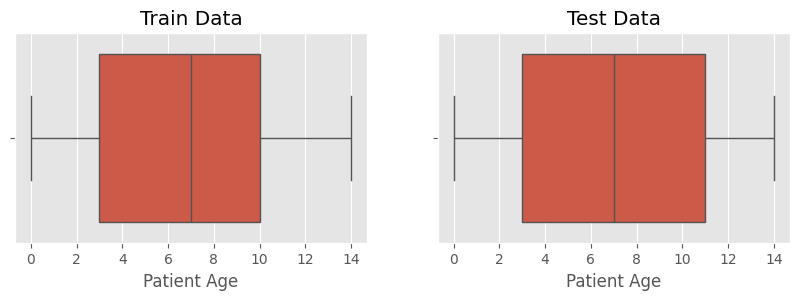

In [ ]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'Patient Age', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'Patient Age', data= test)
plt.title('Test Data')

plt.show()

In [ ]:
train['Inherited from father'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:

## Filling Missing Values with 'No'
#### train['Inherited from father'].fillna('No', inplace= True)
#### test['Inherited from father'].fillna('No', inplace= True)

### Train Data
for i in range(0,21805):
    if (train['Inherited from father'].isnull()[i] == True):
        if (train['Paternal gene'][i] == "Yes"):
          train['Inherited from father'][i] = 'Yes'
        elif (train['Paternal gene'][i] == "No"):
          train['Inherited from father'][i] = 'No'
        else:
          train['Inherited from father'][i] = 'No'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Inherited from father'].isnull()[i] == True):
        if (test['Paternal gene'][i] == "Yes"):
          test['Inherited from father'][i] = 'Yes'
        elif (test['Paternal gene'][i] == "No"):
          test['Inherited from father'][i] = 'No'
        else:
          test['Inherited from father'][i] = 'No'
    else:
      continue

In [ ]:
train['Inherited from father'].value_counts()

Inherited from father
No     13122
Yes     8683
Name: count, dtype: int64

In [ ]:
train['Maternal gene'].unique()

array(['Yes', 'No', nan], dtype=object)

In [ ]:
## Filling Missing Values with 'No'
## train['Maternal gene'].fillna('No', inplace= True)
## test['Maternal gene'].fillna('No', inplace= True)

### Train Data
for i in range(0,21805):
    if (train['Maternal gene'].isnull()[i] == True):
        if (train["Genes in mother's side"][i] == "Yes"):
          train['Maternal gene'][i] = 'Yes'
        elif (train["Genes in mother's side"][i] == "No"):
          train['Maternal gene'][i] = 'No'
        else:
          train['Maternal gene'][i] = 'No'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Maternal gene'].isnull()[i] == True):
        if (test["Genes in mother's side"][i] == "Yes"):
          test['Maternal gene'][i] = 'Yes'
        elif (test["Genes in mother's side"][i] == "No"):
          test['Maternal gene'][i] = 'No'
        else:
          test['Maternal gene'][i] = 'No'
    else:
      continue

In [ ]:
train['Maternal gene'].value_counts()

Maternal gene
Yes    12174
No      9631
Name: count, dtype: int64

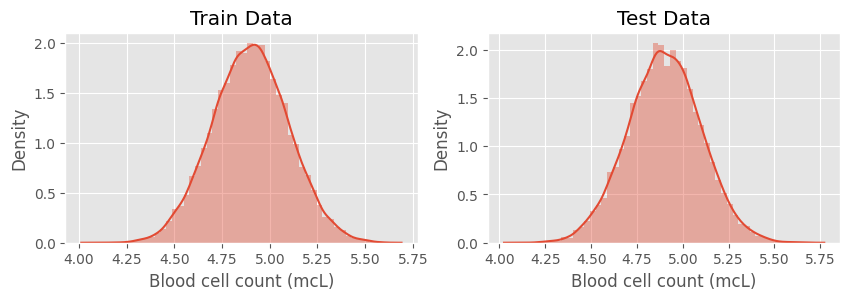

In [ ]:
## Checking the Distribution
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.distplot(train['Blood cell count (mcL)'])
plt.title('Train Data')
plt.subplot(2,2,2)
sns.distplot(test['Blood cell count (mcL)'])
plt.title('Test Data')

plt.show()

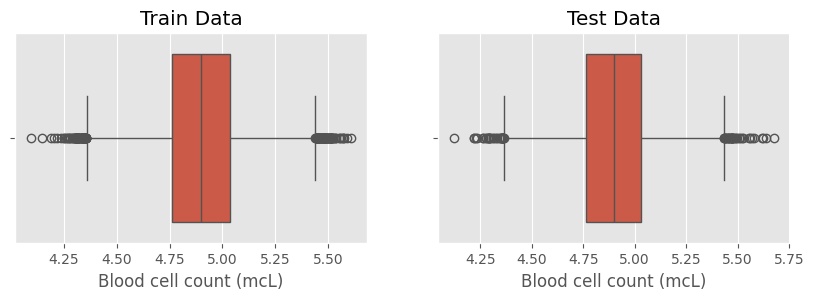

In [ ]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'Blood cell count (mcL)', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'Blood cell count (mcL)', data= test)
plt.title('Test Data')

plt.show()

In [ ]:
## Z-Score --> When Feature follows Normal Distibution.

### Train Dataset
mean = train['Blood cell count (mcL)'].mean()
std = train['Blood cell count (mcL)'].std()

Upper_Bound = mean + (3*std)
Lower_Bound = mean - (3*std)

train['Blood cell count (mcL)'][train['Blood cell count (mcL)'] < Lower_Bound] = Lower_Bound
train['Blood cell count (mcL)'][train['Blood cell count (mcL)'] > Upper_Bound] = Upper_Bound




### Test Dataset
mean = test['Blood cell count (mcL)'].mean()
std = test['Blood cell count (mcL)'].std()

Upper_Bound = mean + (3*std)
Lower_Bound = mean - (3*std)

test['Blood cell count (mcL)'][test['Blood cell count (mcL)'] < Lower_Bound] = Lower_Bound
test['Blood cell count (mcL)'][test['Blood cell count (mcL)'] > Upper_Bound] = Upper_Bound

In [ ]:
## Filling the Missing Values with the Average Mean.
train["Mother's age"].fillna(round(train["Mother's age"].mean()), inplace= True)

## Filling the Missing Values with the Average Mean.
train["Father's age"].fillna(round(train["Father's age"].mean()), inplace= True)

In [ ]:
## Filling Missing Values with 'Normal (30-60)'
## train['Respiratory Rate (breaths/min)'].fillna('Normal (30-60)', inplace= True)
test['Respiratory Rate (breaths/min)'].replace('-99', np.nan, inplace= True)
## test['Respiratory Rate (breaths/min)'].fillna('Normal (30-60)', inplace= True)


### Train Data
for i in range(0,21805):
    if (train['Respiratory Rate (breaths/min)'].isnull()[i] == True):
        if (train["Status"][i] == "Alive"):
          train['Respiratory Rate (breaths/min)'][i] = 'Normal (30-60)'
        else:
          train['Respiratory Rate (breaths/min)'][i] = 'Tachypnea'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Respiratory Rate (breaths/min)'].isnull()[i] == True):
        if (test["Status"][i] == "Alive"):
          test['Respiratory Rate (breaths/min)'][i] = 'Normal (30-60)'
        else:
          test['Respiratory Rate (breaths/min)'][i] = 'Tachypnea'
    else:
      continue

In [ ]:
train['Respiratory Rate (breaths/min)'].value_counts()

Respiratory Rate (breaths/min)
Normal (30-60)    10991
Tachypnea         10814
Name: count, dtype: int64

In [ ]:
## Filling Missing Values with 'Normal'
## train['Heart Rate (rates/min'].fillna('Normal', inplace= True)
test['Heart Rate (rates/min'].replace('-99', np.nan, inplace= True)
## test['Heart Rate (rates/min'].fillna('Normal', inplace= True)


### Train Data
for i in range(0,21805):
    if (train['Heart Rate (rates/min'].isnull()[i] == True):
        if (train["Respiratory Rate (breaths/min)"][i] == "Normal (30-60)"):
          train['Heart Rate (rates/min'][i] = 'Normal'
        else:
          train['Heart Rate (rates/min'][i] = 'Tachycardia'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Heart Rate (rates/min'].isnull()[i] == True):
        if (test["Respiratory Rate (breaths/min)"][i] == "Normal (30-60)"):
          test['Heart Rate (rates/min'][i] = 'Normal'
        else:
          test['Heart Rate (rates/min'][i] = 'Tachycardia'
    else:
      continue

In [ ]:
train['Heart Rate (rates/min'].value_counts()

Heart Rate (rates/min
Normal         11156
Tachycardia    10649
Name: count, dtype: int64

In [ ]:
train.drop(columns= ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], inplace= True)
test.drop(columns= ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], inplace= True)


In [ ]:
## Filling Missing Values with 'No'
train['Parental consent'].fillna('No', inplace= True)
test['Parental consent'].replace('-99', np.nan, inplace= True)
test['Parental consent'].fillna('No', inplace= True)

In [ ]:
train['Parental consent'].value_counts()

Parental consent
Yes    19719
No      2086
Name: count, dtype: int64

In [ ]:

# This loop is for Train Data.
for i in range(0,21805):
    if (train['Follow-up'].isnull()[i] == True):
        if (train['Respiratory Rate (breaths/min)'][i] == "Tachypnea"):
          train['Follow-up'][i] = 'High'
        elif (train['Heart Rate (rates/min'][i] == "Tachycardia"):
          train['Follow-up'][i] = 'High'
        else:
          train['Follow-up'][i] = 'Low'
    else:
      continue



test['Follow-up'].replace('-99', np.nan, inplace= True)
# This loop is for Test Data.
for i in range(0,9465):
    if (test['Follow-up'].isnull()[i] == True):
        if (test['Respiratory Rate (breaths/min)'][i] == "Tachypnea"):
          test['Follow-up'][i] = 'High'
        elif (test['Heart Rate (rates/min'][i] == "Tachycardia"):
          test['Follow-up'][i] = 'High'
        else:
          test['Follow-up'][i] = 'Low'
    else:
      continue

In [ ]:
train['Follow-up'].value_counts()

Follow-up
High    11248
Low     10557
Name: count, dtype: int64

In [ ]:
train["Gender"].mode()

0    Ambiguous
Name: Gender, dtype: object

In [ ]:
## Filling Missing Values with 'Ambiguous'
train['Gender'].fillna('Ambiguous', inplace= True)
test['Gender'].replace('-99', np.nan, inplace= True)
test['Gender'].fillna('Ambiguous', inplace= True)


In [ ]:
### Train Data
train["Birth asphyxia"].replace('No record', 'Not available', inplace= True)
train["Birth asphyxia"].fillna('No', inplace= True)


### Test Data
test["Birth asphyxia"].replace('No record', 'Not available', inplace= True)
test["Birth asphyxia"].replace('-99', np.nan, inplace= True)
test["Birth asphyxia"].fillna('No', inplace= True)

In [ ]:
### Train Data
train["Autopsy shows birth defect (if applicable)"].replace('None', 'No', inplace= True)

for i in range(0,21805):
    if (train["Autopsy shows birth defect (if applicable)"].isnull()[i] == True):
        if (train['Inherited from father'][i] == "Yes"):
          train["Autopsy shows birth defect (if applicable)"][i] = 'Yes'
        else:
          train["Autopsy shows birth defect (if applicable)"][i] = 'No'
    else:
      continue



### Test Data
test["Autopsy shows birth defect (if applicable)"].replace('-99', np.nan, inplace= True)
test["Autopsy shows birth defect (if applicable)"].replace('None', 'No', inplace= True)

for i in range(0,9465):
    if (test["Autopsy shows birth defect (if applicable)"].isnull()[i] == True):
        if (test['Inherited from father'][i] == "Yes"):
          test["Autopsy shows birth defect (if applicable)"][i] = 'Yes'
        else:
          test["Autopsy shows birth defect (if applicable)"][i] = 'No'
    else:
      continue

In [ ]:
train["Autopsy shows birth defect (if applicable)"].value_counts()

Autopsy shows birth defect (if applicable)
Not applicable    10955
No                 5758
Yes                5092
Name: count, dtype: int64

In [ ]:
train["Folic acid details (peri-conceptional)"].fillna('No', inplace= True)

test["Folic acid details (peri-conceptional)"].replace('-99', np.nan, inplace= True)
test["Folic acid details (peri-conceptional)"].fillna('No', inplace= True)

In [ ]:
train["Folic acid details (peri-conceptional)"].value_counts()

Folic acid details (peri-conceptional)
No     11840
Yes     9965
Name: count, dtype: int64

In [ ]:
train["H/O radiation exposure (x-ray)"].fillna('No', inplace= True)
train["H/O radiation exposure (x-ray)"].replace('-', 'No', inplace= True)
train["H/O radiation exposure (x-ray)"].replace('Not applicable', 'No', inplace= True)


test["H/O radiation exposure (x-ray)"].replace('-99', np.nan, inplace= True)
test["H/O radiation exposure (x-ray)"].fillna('No', inplace= True)
test["H/O radiation exposure (x-ray)"].replace('-', 'No', inplace= True)
test["H/O radiation exposure (x-ray)"].replace('Not applicable', 'No', inplace= True)


In [ ]:

train["H/O radiation exposure (x-ray)"].value_counts()

H/O radiation exposure (x-ray)
No     16881
Yes     4924
Name: count, dtype: int64

In [ ]:
train["H/O substance abuse"].fillna('No', inplace= True)
train["H/O substance abuse"].replace('-', 'No', inplace= True)
train["H/O substance abuse"].replace('Not applicable', 'No', inplace= True)


test["H/O substance abuse"].replace('-99', np.nan, inplace= True)
test["H/O substance abuse"].fillna('No', inplace= True)
test["H/O substance abuse"].replace('-', 'No', inplace= True)
test["H/O substance abuse"].replace('Not applicable', 'No', inplace= True)


In [ ]:
train["H/O substance abuse"].value_counts()

H/O substance abuse
No     16891
Yes     4914
Name: count, dtype: int64

In [ ]:
test["Assisted conception IVF/ART"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Assisted conception IVF/ART'].isnull()[i] == True):
        if (train['Folic acid details (peri-conceptional)'][i] == "Yes"):
          train['Assisted conception IVF/ART'][i] = 'Yes'
        else:
          train['Assisted conception IVF/ART'][i] = 'No'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Assisted conception IVF/ART'].isnull()[i] == True):
        if (test['Folic acid details (peri-conceptional)'][i] == "Yes"):
          test['Assisted conception IVF/ART'][i] = 'Yes'
        else:
          test['Assisted conception IVF/ART'][i] = 'No'
    else:
      continue

In [ ]:
train["Assisted conception IVF/ART"].value_counts()

Assisted conception IVF/ART
No     10969
Yes    10836
Name: count, dtype: int64

In [ ]:
train["History of anomalies in previous pregnancies"].fillna('No', inplace= True)

test["History of anomalies in previous pregnancies"].replace('-99', np.nan, inplace= True)
test["History of anomalies in previous pregnancies"].fillna('No', inplace= True)


In [ ]:
train["No. of previous abortion"].fillna(0, inplace= True)

test["No. of previous abortion"].replace(-99, 0, inplace= True)


In [ ]:
test["Birth defects"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Birth defects'].isnull()[i] == True):
        if (train["Mother's age"][i] > 34):
          if (train["H/O substance abuse"][i] == 'Yes'):
            train['Birth defects'][i] = 'Multiple'
          else:
            train['Birth defects'][i] = 'Singular'
        else:
            train['Birth defects'][i] = 'Singular'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Birth defects'].isnull()[i] == True):
        if (test["Mother's age"][i] > 34):
          if (test["H/O substance abuse"][i] == 'Yes'):
            test['Birth defects'][i] = 'Multiple'
          else:
            test['Birth defects'][i] = 'Singular'
        else:
            test['Birth defects'][i] = 'Singular'
    else:
      continue

In [ ]:
train["Birth defects"].value_counts()

Birth defects
Singular    11647
Multiple    10158
Name: count, dtype: int64

In [ ]:
train["White Blood cell count (thousand per microliter)"].fillna(train["White Blood cell count (thousand per microliter)"].mean(), inplace= True)

test["White Blood cell count (thousand per microliter)"].replace(-99, np.nan, inplace= True)
test["White Blood cell count (thousand per microliter)"].fillna(test["White Blood cell count (thousand per microliter)"].mean(), inplace= True)

Text(0.5, 1.0, 'Test Data')

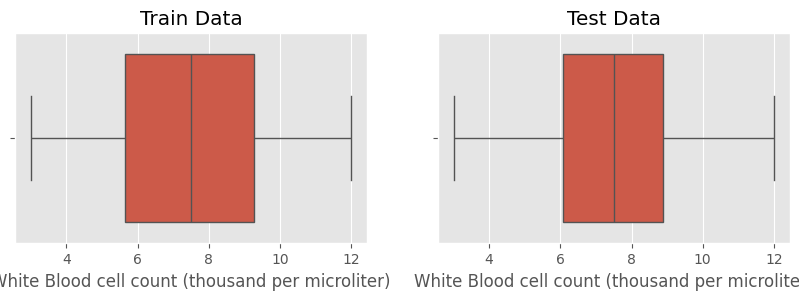

In [ ]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'White Blood cell count (thousand per microliter)', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'White Blood cell count (thousand per microliter)', data= test)
plt.title('Test Data')


In [ ]:

## Understanding the Division of Genetic Disorders.
table3 = pd.pivot_table(train, index= ['Blood test result'],
                        values= 'White Blood cell count (thousand per microliter)', aggfunc= np.mean)
table3

,White Blood cell count (thousand per microliter)
Blood test result,
abnormal,7.462121
inconclusive,7.482236
normal,7.502300
slightly abnormal,7.499233


In [ ]:
## train["Blood test result"].fillna('slightly abnormal', inplace= True)
## test["Blood test result"].fillna('slightly abnormal', inplace= True)

test["Blood test result"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Blood test result'].isnull()[i] == True):
        if (5 < train["White Blood cell count (thousand per microliter)"][i] < 10):
          train['Blood test result'][i] = 'normal'
        elif (10 < train["White Blood cell count (thousand per microliter)"][i] < 1):
          train['Blood test result'][i] = 'abnormal'
        elif (1 < train["White Blood cell count (thousand per microliter)"][i] > 4):
          train['Blood test result'][i] = 'slightly abnormal'
        else:
            train['Blood test result'][i] = 'inconclusive'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Blood test result'].isnull()[i] == True):
        if (5 < test["White Blood cell count (thousand per microliter)"][i] < 10):
          test['Blood test result'][i] = 'normal'
        elif (10 < test["White Blood cell count (thousand per microliter)"][i] < 1):
          test['Blood test result'][i] = 'abnormal'
        elif (1 < test["White Blood cell count (thousand per microliter)"][i] > 4):
          test['Blood test result'][i] = 'slightly abnormal'
        else:
            test['Blood test result'][i] = 'inconclusive'
    else:
      continue


In [ ]:
train["Blood test result"].value_counts()

Blood test result
normal               6298
slightly abnormal    5562
inconclusive         5104
abnormal             4841
Name: count, dtype: int64

In [ ]:
train["Symptom 1"].fillna(0, inplace= True)
train["Symptom 2"].fillna(0, inplace= True)
train["Symptom 3"].fillna(0, inplace= True)
train["Symptom 4"].fillna(0, inplace= True)
train["Symptom 5"].fillna(0, inplace= True)


## Replacing Boolean values
test["Symptom 1"] = np.where(test["Symptom 1"] == True, 1, 0)
test["Symptom 2"] = np.where(test["Symptom 2"] == True, 1, 0)
test["Symptom 3"] = np.where(test["Symptom 3"] == True, 1, 0)
test["Symptom 4"] = np.where(test["Symptom 4"] == True, 1, 0)
test["Symptom 5"] = np.where(test["Symptom 5"] == True, 1, 0)

In [ ]:

train.head(25)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,Yes,No,Yes,No,4.760603,35.0,42.0,Alive,Normal (30-60),Normal,Yes,High,Ambiguous,No,Not applicable,No,No,No,No,Yes,0.0,Singular,9.857562,normal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,35.0,23.0,Deceased,Tachypnea,Normal,Yes,High,Ambiguous,No,Yes,Yes,No,No,No,Yes,0.0,Multiple,5.522560,normal,1.0,0.0,1.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,Yes,Low,Ambiguous,Not available,Not applicable,Yes,Yes,No,Yes,Yes,4.0,Singular,7.488293,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,42.0,Deceased,Tachypnea,Normal,Yes,High,Male,Not available,No,No,No,No,No,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,42.0,Alive,Tachypnea,Tachycardia,No,Low,Male,Not available,Not applicable,No,No,No,Yes,No,4.0,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,35.0,42.0,Deceased,Tachypnea,Normal,Yes,Low,Female,Not available,No,No,No,No,No,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,3.0,Yes,No,Yes,Yes,4.901080,35.0,63.0,Alive,Normal (30-60),Normal,No,Low,Male,Not available,Not applicable,No,No,No,Yes,No,3.0,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,3.0,No,No,Yes,Yes,4.964816,40.0,42.0,Alive,Tachypnea,Normal,Yes,Low,Ambiguous,Not available,Not applicable,Yes,No,No,No,Yes,1.0,Singular,9.836352,inconclusive,0.0,0.0,1.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
8,11.0,No,No,Yes,No,5.209058,45.0,44.0,Alive,Tachypnea,Tachycardia,Yes,Low,Male,Yes,Not applicable,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome


In [ ]:

# Obtaining the Categorical Columns
categorical_features = [features for features in train.columns if train[features].dtypes == 'O']
categorical_features

["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Folic acid details (peri-conceptional)',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder',
 'Disorder Subclass']

In [ ]:
# Obtaining the Categorical Columns
categorical_features_test = [features for features in test.columns if test[features].dtypes == 'O']


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
for feature in categorical_features:
    ## Encode labels in all Categorical Columns.
    train[feature]= label_encoder.fit_transform(train[feature])



for features in categorical_features_test:
    ## Encode labels in all Categorical Columns.
    test[features]= label_encoder.fit_transform(test[features])

In [ ]:

train.head(25)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,1,0,1,0,4.760603,35.0,42.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,1,9.857562,2,1.0,1.0,1.0,1.0,1.0,0,5
1,4.0,1,1,0,0,4.910669,35.0,23.0,1,1,0,1,0,0,0,2,1,0,0,0,1,0.0,0,5.522560,2,1.0,0.0,1.0,1.0,0.0,2,2
2,6.0,1,0,0,0,4.893297,41.0,22.0,0,0,1,1,1,0,1,1,1,1,0,1,1,4.0,1,7.488293,2,0.0,1.0,1.0,1.0,1.0,1,3
3,12.0,1,0,1,0,4.705280,21.0,42.0,1,1,0,1,0,2,1,0,0,0,0,0,1,1.0,1,7.919321,1,0.0,0.0,1.0,0.0,0.0,0,6
4,11.0,1,0,1,1,4.720703,32.0,42.0,0,1,1,0,1,2,1,1,0,0,0,1,0,4.0,0,4.098210,3,0.0,0.0,0.0,0.0,0.0,1,1
5,14.0,1,0,1,0,5.103188,35.0,42.0,1,1,0,1,1,1,1,0,0,0,0,0,0,0.0,0,10.272230,2,1.0,0.0,0.0,1.0,0.0,2,2
6,3.0,1,0,1,1,4.901080,35.0,63.0,0,0,0,0,1,2,1,1,0,0,0,1,0,3.0,0,6.825974,2,0.0,0.0,0.0,0.0,0.0,2,8
7,3.0,0,0,1,1,4.964816,40.0,42.0,0,1,0,1,1,0,1,1,1,0,0,0,1,1.0,1,9.836352,1,0.0,0.0,1.0,0.0,0.0,2,8
8,11.0,0,0,1,0,5.209058,45.0,44.0,0,1,1,1,1,2,2,1,1,0,0,0,1,0.0,0,6.669552,3,1.0,1.0,1.0,0.0,1.0,0,6


In [ ]:
# Obtaining Numerical Columns
numerical_features = [features for features in train.columns if train[features].dtypes != 'O']
numerical_features

['Patient Age',
 "Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Folic acid details (peri-conceptional)',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'No. of previous abortion',
 'Birth defects',
 'White Blood cell count (thousand per microliter)',
 'Blood test result',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5',
 'Genetic Disorder',
 'Disorder Subclass']

In [ ]:

# Selecting all Features that need to be Scaled except the Target Variable.
scale_feature = [features for features in numerical_features if features not in ['Genetic Disorder', 'Disorder Subclass', "Genes in mother's side",
                                                                                 'Inherited from father', 'Maternal gene', 'Paternal gene',
                                                                                 'Status', 'Respiratory Rate (breaths/min)',
                                                                                 'Heart Rate (rates/min', 'Parental consent', 'Follow-up',
                                                                                 'Gender', 'Birth asphyxia',
                                                                                 'Autopsy shows birth defect (if applicable)',
                                                                                 'Folic acid details (peri-conceptional)',
                                                                                 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
                                                                                 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2',
                                                                                 'Symptom 3', 'Symptom 4', 'Symptom 5',
                                                                                 'History of anomalies in previous pregnancies',
                                                                                 'Birth defects', 'Blood test result']]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


# Transform the train set and add the 'Genetic Disorder', 'Disorder Subclass' Columns.
train = pd.concat([train[['Genetic Disorder', 'Disorder Subclass', "Genes in mother's side", 'Inherited from father', 'Maternal gene',
                          'Paternal gene', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 'Follow-up',
                          'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)',
                          'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2',
                          'Symptom 3', 'Symptom 4', 'Symptom 5', 'History of anomalies in previous pregnancies', 'Birth defects',
                          'Blood test result']].reset_index(drop= True),
       pd.DataFrame(scaler.fit_transform(train[scale_feature]), columns= scale_feature)], axis= 1)
       ## Converting to Dataframe as after transform its an array.

train.head()


,Genetic Disorder,Disorder Subclass,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,History of anomalies in previous pregnancies,Birth defects,Blood test result,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter)
0,0,5,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1,1,2,-0.714286,-0.511845,0.000000,0.000000,-0.666667,0.652979
1,2,2,1,1,0,0,1,1,0,1,0,0,0,2,1,0,0,0,1.0,0.0,1.0,1.0,0.0,1,0,2,-0.428571,0.042123,0.000000,-1.357143,-0.666667,-0.541763
2,1,3,1,0,0,0,0,0,1,1,1,0,1,1,1,1,0,1,0.0,1.0,1.0,1.0,1.0,1,1,2,-0.142857,-0.022004,0.545455,-1.428571,0.666667,0.000000
3,0,6,1,0,1,0,1,1,0,1,0,2,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1,1,1,0.714286,-0.716068,-1.272727,0.000000,-0.333333,0.118793
4,1,1,1,0,1,1,0,1,1,0,1,2,1,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,3,0.571429,-0.659137,-0.272727,0.000000,0.666667,-0.934318


In [ ]:
# Selecting all Features that need to be Scaled except the Target Variable.
scale_feature = [features for features in numerical_features if features not in ['Genetic Disorder', 'Disorder Subclass', "Genes in mother's side",
                                                                                 'Inherited from father', 'Maternal gene', 'Paternal gene',
                                                                                 'Status', 'Respiratory Rate (breaths/min)',
                                                                                 'Heart Rate (rates/min', 'Parental consent', 'Follow-up',
                                                                                 'Gender', 'Birth asphyxia',
                                                                                 'Autopsy shows birth defect (if applicable)',
                                                                                 'Folic acid details (peri-conceptional)',
                                                                                 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
                                                                                 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2',
                                                                                 'Symptom 3', 'Symptom 4', 'Symptom 5',
                                                                                 'History of anomalies in previous pregnancies',
                                                                                 'Birth defects', 'Blood test result']]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


# Transform the test set and add the remaining Column.
test = pd.concat([test[["Genes in mother's side", 'Inherited from father', 'Maternal gene',
                        'Paternal gene', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent',
                        'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)',
                        'Folic acid details (peri-conceptional)', 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
                        'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
                        'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']].reset_index(drop= True),
       pd.DataFrame(scaler.fit_transform(test[scale_feature]), columns= scale_feature)], axis= 1)
       ## Converting to Dataframe as after transform its an array.

test.head()


,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,History of anomalies in previous pregnancies,Birth defects,Blood test result,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter)
0,0,1,0,0,0,1,0,0,1,2,2,1,1,1,0,0,1,1,1,1,1,0,0,3,-0.125,0.309384,0.176471,0.826087,0.333333,0.000000
1,1,0,1,1,0,0,0,1,1,2,2,1,1,0,0,0,0,0,0,1,0,1,0,2,0.375,0.822755,-0.117647,0.478261,-0.333333,0.242998
2,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,1,3,-0.250,-0.085089,0.764706,0.782609,-0.333333,0.000000
3,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,1,2,0.750,-0.789999,-0.588235,0.565217,-0.333333,-0.216795
4,0,1,0,1,1,1,1,1,1,0,0,2,1,1,0,0,1,1,1,1,0,0,0,2,-0.250,0.947969,0.352941,-0.173913,-0.333333,-0.461292


In [ ]:
## Capture the Independent Variables
X = train.drop(columns= ['Genetic Disorder', 'Disorder Subclass'], axis= 1)

## Capture the Dependent Variable
y1 = train['Genetic Disorder']
y2 = train['Disorder Subclass']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

## Genetic Disorder
model = ExtraTreesClassifier()
model.fit(X,y1)

## Disorder Subclass
model2 = ExtraTreesClassifier()
model2.fit(X,y2)

ExtraTreesClassifier()

In [ ]:
print('Y1')
print(model.feature_importances_)
print()
print('Y2')
print(model2.feature_importances_)


Y1
[0.02074858 0.02145419 0.0216329  0.02507083 0.02382546 0.02988696
 0.03077341 0.0164425  0.02922021 0.04021657 0.04131273 0.02866082
 0.03042792 0.02455917 0.02396274 0.03015614 0.02006577 0.02411639
 0.02729161 0.03043416 0.03374072 0.02998049 0.02911752 0.04544259
 0.05509417 0.05566879 0.05298323 0.05375095 0.0480945  0.05586795]

Y2
[0.02100105 0.02044926 0.02044162 0.02259249 0.02304996 0.02990189
 0.03089156 0.01548633 0.02926405 0.04109115 0.04044648 0.02826259
 0.03089226 0.02389604 0.02449077 0.03028927 0.02049581 0.0232577
 0.02607688 0.02975061 0.03643503 0.03123597 0.0294733  0.04567381
 0.0550494  0.05681205 0.05369859 0.05441859 0.048411   0.05676452]


In [ ]:
ranked_features = pd.Series(model.feature_importances_, index= X.columns)
ranked_features.nlargest(19)

White Blood cell count (thousand per microliter)    0.055868
Blood cell count (mcL)                              0.055669
Patient Age                                         0.055094
Father's age                                        0.053751
Mother's age                                        0.052983
No. of previous abortion                            0.048095
Blood test result                                   0.045443
Birth asphyxia                                      0.041313
Gender                                              0.040217
Symptom 5                                           0.033741
Heart Rate (rates/min                               0.030773
Symptom 4                                           0.030434
Folic acid details (peri-conceptional)              0.030428
Assisted conception IVF/ART                         0.030156
History of anomalies in previous pregnancies        0.029980
Respiratory Rate (breaths/min)                      0.029887
Follow-up               

In [ ]:
ranked_features2 = pd.Series(model2.feature_importances_, index= X.columns)
ranked_features2.nlargest(19)

Blood cell count (mcL)                              0.056812
White Blood cell count (thousand per microliter)    0.056765
Patient Age                                         0.055049
Father's age                                        0.054419
Mother's age                                        0.053699
No. of previous abortion                            0.048411
Blood test result                                   0.045674
Gender                                              0.041091
Birth asphyxia                                      0.040446
Symptom 5                                           0.036435
History of anomalies in previous pregnancies        0.031236
Folic acid details (peri-conceptional)              0.030892
Heart Rate (rates/min                               0.030892
Assisted conception IVF/ART                         0.030289
Respiratory Rate (breaths/min)                      0.029902
Symptom 4                                           0.029751
Birth defects           

In [ ]:
ranked_features2.nlargest(19).index

Index(['Blood cell count (mcL)',
       'White Blood cell count (thousand per microliter)', 'Patient Age',
       'Father's age', 'Mother's age', 'No. of previous abortion',
       'Blood test result', 'Gender', 'Birth asphyxia', 'Symptom 5',
       'History of anomalies in previous pregnancies',
       'Folic acid details (peri-conceptional)', 'Heart Rate (rates/min',
       'Assisted conception IVF/ART', 'Respiratory Rate (breaths/min)',
       'Symptom 4', 'Birth defects', 'Follow-up',
       'Autopsy shows birth defect (if applicable)'],
      dtype='object')

In [ ]:
X = X[['White Blood cell count (thousand per microliter)', 'Blood cell count (mcL)', 'Patient Age', "Father's age", "Mother's age",
       'No. of previous abortion', 'Blood test result', 'Gender', 'Birth asphyxia', 'Symptom 5', 'Heart Rate (rates/min',
       'Respiratory Rate (breaths/min)', 'Folic acid details (peri-conceptional)', 'History of anomalies in previous pregnancies',
       'Autopsy shows birth defect (if applicable)', 'Assisted conception IVF/ART', 'Symptom 4', 'Follow-up', 'Birth defects']]

X.head()


,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects
0,0.652979,-0.511845,-0.714286,0.000000,0.000000,-0.666667,2,0,0,1.0,0,0,0,1,1,0,1.0,0,1
1,-0.541763,0.042123,-0.428571,-1.357143,0.000000,-0.666667,2,0,0,0.0,0,1,1,1,2,0,1.0,0,0
2,0.000000,-0.022004,-0.142857,-1.428571,0.545455,0.666667,2,0,1,1.0,1,0,1,1,1,1,1.0,1,1
3,0.118793,-0.716068,0.714286,0.000000,-1.272727,-0.333333,1,2,1,0.0,0,1,0,1,0,0,0.0,0,1
4,-0.934318,-0.659137,0.571429,0.000000,-0.272727,0.666667,3,2,1,0.0,1,1,0,0,1,1,0.0,1,0


In [ ]:
X.shape


(21805, 19)

In [ ]:
test = test[['White Blood cell count (thousand per microliter)', 'Blood cell count (mcL)', 'Patient Age', "Father's age",
             "Mother's age", 'No. of previous abortion', 'Blood test result', 'Gender', 'Birth asphyxia', 'Symptom 5',
             'Heart Rate (rates/min', 'Respiratory Rate (breaths/min)', 'Folic acid details (peri-conceptional)',
             'History of anomalies in previous pregnancies', 'Autopsy shows birth defect (if applicable)',
             'Assisted conception IVF/ART', 'Symptom 4', 'Follow-up', 'Birth defects']]

test.head()

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects
0,0.000000,0.309384,-0.125,0.826087,0.176471,0.333333,3,2,2,1,0,1,1,0,1,0,1,1,0
1,0.242998,0.822755,0.375,0.478261,-0.117647,-0.333333,2,2,2,0,0,0,1,1,1,0,1,1,0
2,0.000000,-0.085089,-0.250,0.782609,0.764706,-0.333333,3,0,1,0,0,1,0,0,0,1,1,1,1
3,-0.216795,-0.789999,0.750,0.565217,-0.588235,-0.333333,2,0,0,1,0,0,1,1,1,1,0,1,1
4,-0.461292,0.947969,-0.250,-0.173913,0.352941,-0.333333,2,0,0,0,1,1,1,0,2,0,1,1,0


In [ ]:
## Combining the Target Variables.
train = pd.concat([X, y1, y2], axis=1)
train.head()

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects,Genetic Disorder,Disorder Subclass
0,0.652979,-0.511845,-0.714286,0.000000,0.000000,-0.666667,2,0,0,1.0,0,0,0,1,1,0,1.0,0,1,0,5
1,-0.541763,0.042123,-0.428571,-1.357143,0.000000,-0.666667,2,0,0,0.0,0,1,1,1,2,0,1.0,0,0,2,2
2,0.000000,-0.022004,-0.142857,-1.428571,0.545455,0.666667,2,0,1,1.0,1,0,1,1,1,1,1.0,1,1,1,3
3,0.118793,-0.716068,0.714286,0.000000,-1.272727,-0.333333,1,2,1,0.0,0,1,0,1,0,0,0.0,0,1,0,6
4,-0.934318,-0.659137,0.571429,0.000000,-0.272727,0.666667,3,2,1,0.0,1,1,0,0,1,1,0.0,1,0,1,1


In [ ]:
train.isnull().any()

White Blood cell count (thousand per microliter)    False
Blood cell count (mcL)                              False
Patient Age                                         False
Father's age                                        False
Mother's age                                        False
No. of previous abortion                            False
Blood test result                                   False
Gender                                              False
Birth asphyxia                                      False
Symptom 5                                           False
Heart Rate (rates/min                               False
Respiratory Rate (breaths/min)                      False
Folic acid details (peri-conceptional)              False
History of anomalies in previous pregnancies        False
Autopsy shows birth defect (if applicable)          False
Assisted conception IVF/ART                         False
Symptom 4                                           False
Follow-up     

In [ ]:
test.isnull().any()

White Blood cell count (thousand per microliter)    False
Blood cell count (mcL)                              False
Patient Age                                         False
Father's age                                        False
Mother's age                                        False
No. of previous abortion                            False
Blood test result                                   False
Gender                                              False
Birth asphyxia                                      False
Symptom 5                                           False
Heart Rate (rates/min                               False
Respiratory Rate (breaths/min)                      False
Folic acid details (peri-conceptional)              False
History of anomalies in previous pregnancies        False
Autopsy shows birth defect (if applicable)          False
Assisted conception IVF/ART                         False
Symptom 4                                           False
Follow-up     

In [ ]:
train.to_csv('/content/drive/MyDrive/Genetic_Disorder/Final_train.csv', index=False)
test.to_csv('/content/drive/MyDrive/Genetic_Disorder/Final_test.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Python Imports
import math,time,random,datetime
!pip install lazypredict
# Data Manipulation
import numpy as np
import pandas as pd

# Maching Learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Display all Columns
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

import six
import sys
sys.modules['sklearn.externals.six'] = six

# Imbalanced Data Handling
from imblearn.combine import SMOTETomek
from collections import Counter
import lazypredict
from lazypredict.Supervised import LazyClassifier


# Import the train and test data.
train = pd.read_csv('/content/drive/MyDrive/Genetic_Disorder/Final_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Genetic_Disorder/Final_test.csv')

In [ ]:
## Capture the Independent Variables
X = train.drop(columns= ['Genetic Disorder', 'Disorder Subclass'], axis= 1)

## Capture the Dependent Variable
y1 = train['Genetic Disorder']
y2 = train['Disorder Subclass']


## For Genetic Disorder
os= SMOTETomek(random_state= 100)
X1_ns,y1_ns = os.fit_resample(X, y1)
print("The number of classes before fit {}".format(Counter(y1)))
print("The number of classes after fit {}".format(Counter(y1_ns)))



The number of classes before fit Counter({0: 11174, 2: 8371, 1: 2260})
The number of classes after fit Counter({1: 11163, 2: 10205, 0: 10200})


In [ ]:
## Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X1_ns, y1_ns, test_size= 0.30, random_state= 42)



In [ ]:
from sklearn.multiclass import OneVsRestClassifier
model = LogisticRegression()

In [ ]:
## Step 1:
algo = OneVsRestClassifier(model)
model = algo.fit(X_train, y_train)                          # Creating the model. We will fit the algorithm to the training data.
log_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
log_train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
log_acc_cv = round(metrics.accuracy_score(y_train, log_train_pred)*100, 2)
log_f1_cv = round(metrics.f1_score(y_train, log_train_pred, average='macro')*100, 2)


In [ ]:
print('Accuracy of the model is: ', log_acc)
print('Accuracy of 10-Fold CV is: ', log_acc_cv)
print('F1 Score is: ', log_f1_cv)

Accuracy of the model is:  51.76
Accuracy of 10-Fold CV is:  51.35
F1 Score is:  49.31


In [ ]:
# OvR Classifier
model = KNeighborsClassifier()

## Step 1:
algo = OneVsRestClassifier(model)
model1 = algo.fit(X_train, y_train)
knn_acc = round(model1.score(X_train, y_train)*100, 2)

## Step 2:
knn_train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:
knn_acc_cv = round(metrics.accuracy_score(y_train, knn_train_pred)*100, 2)
knn_f1_cv = round(metrics.f1_score(y_train, knn_train_pred, average='macro')*100, 2)

print('Accuracy of the model is: ', knn_acc)
print('Accuracy of 10-Fold CV is: ', knn_acc_cv)
print('F1 Score is: ', knn_f1_cv)

Accuracy of the model is:  74.82
Accuracy of 10-Fold CV is:  61.61
F1 Score is:  57.63


In [ ]:
# OvR Classifier
model = GaussianNB()

## Step 1:
algo = OneVsRestClassifier(model)
model2 = algo.fit(X_train, y_train)
gnb_acc = round(model2.score(X_train, y_train)*100, 2)

## Step 2:
gnb_train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:
gnb_acc_cv = round(metrics.accuracy_score(y_train, gnb_train_pred)*100, 2)
gnb_f1_cv = round(metrics.f1_score(y_train, gnb_train_pred, average='macro')*100, 2)

print('Accuracy of the model is: ', gnb_acc)
print('Accuracy of 10-Fold CV is: ', gnb_acc_cv)
print('F1 Score is: ', gnb_f1_cv)

Accuracy of the model is:  52.6
Accuracy of 10-Fold CV is:  52.29
F1 Score is:  50.55


In [ ]:
# OvR Classifier
model = GaussianNB()

## Step 1:
algo = OneVsRestClassifier(model)
model2 = algo.fit(X_train, y_train)
gnb_acc = round(model2.score(X_train, y_train)*100, 2)

## Step 2:
gnb_train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:
gnb_acc_cv = round(metrics.accuracy_score(y_train, gnb_train_pred)*100, 2)
gnb_f1_cv = round(metrics.f1_score(y_train, gnb_train_pred, average='macro')*100, 2)

print('Accuracy of the model is: ', gnb_acc)
print('Accuracy of 10-Fold CV is: ', gnb_acc_cv)
print('F1 Score is: ', gnb_f1_cv)

Accuracy of the model is:  52.6
Accuracy of 10-Fold CV is:  52.29
F1 Score is:  50.55


In [ ]:
# OvR Classifier
model = LinearSVC()

## Step 1:
algo = OneVsRestClassifier(model)
model3 = algo.fit(X_train, y_train)
svc_acc = round(model3.score(X_train, y_train)*100, 2)

## Step 2:
svc_train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:
svc_acc_cv = round(metrics.accuracy_score(y_train, svc_train_pred)*100, 2)
svc_f1_cv = round(metrics.f1_score(y_train, svc_train_pred, average='macro')*100, 2)

print('Accuracy of the model is: ', svc_acc)
print('Accuracy of 10-Fold CV is: ', svc_acc_cv)
print('F1 Score is: ', svc_f1_cv)

Accuracy of the model is:  51.67
Accuracy of 10-Fold CV is:  51.35
F1 Score is:  48.92


In [ ]:
# OvR Classifier
model = SGDClassifier()

## Step 1:
algo = OneVsRestClassifier(model)
model4 = algo.fit(X_train, y_train)
sgd_acc = round(model4.score(X_train, y_train)*100, 2)

## Step 2:
sgd_train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:
sgd_acc_cv = round(metrics.accuracy_score(y_train, sgd_train_pred)*100, 2)
sgd_f1_cv = round(metrics.f1_score(y_train, sgd_train_pred, average='macro')*100, 2)

print('Accuracy of the model is: ', sgd_acc)
print('Accuracy of 10-Fold CV is: ', sgd_acc_cv)
print('F1 Score is: ', sgd_f1_cv)

Accuracy of the model is:  48.25
Accuracy of 10-Fold CV is:  49.46
F1 Score is:  47.0


In [ ]:
# OvR Classifier
model = DecisionTreeClassifier()

## Step 1:
algo = OneVsRestClassifier(model)
model5 = algo.fit(X_train, y_train)
dec_acc = round(model5.score(X_train, y_train)*100, 2)

## Step 2:
dec_train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:
dec_acc_cv = round(metrics.accuracy_score(y_train, dec_train_pred)*100, 2)
dec_f1_cv = round(metrics.f1_score(y_train, dec_train_pred, average='macro')*100, 2)

print('Accuracy of the model is: ', dec_acc)
print('Accuracy of 10-Fold CV is: ', dec_acc_cv)
print('F1 Score is: ', dec_f1_cv)

Accuracy of the model is:  100.0
Accuracy of 10-Fold CV is:  53.23
F1 Score is:  51.86


In [ ]:
# OvR Classifier
model = GradientBoostingClassifier()

## Step 1:
algo = OneVsRestClassifier(model)
model6 = algo.fit(X_train, y_train)
grd_acc = round(model6.score(X_train, y_train)*100, 2)

## Step 2:
grd_train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:
grd_acc_cv = round(metrics.accuracy_score(y_train, grd_train_pred)*100, 2)
grd_f1_cv = round(metrics.f1_score(y_train, grd_train_pred, average='macro')*100, 2)

print('Accuracy of the model is: ', grd_acc)
print('Accuracy of 10-Fold CV is: ', grd_acc_cv)
print('F1 Score is: ', grd_f1_cv)

Accuracy of the model is:  62.12
Accuracy of 10-Fold CV is:  60.26
F1 Score is:  57.34


In [ ]:
# OvR Classifier
model = RandomForestClassifier()

## Step 1:
algo = OneVsRestClassifier(model)
model7 = algo.fit(X_train, y_train)
rf_acc = round(model7.score(X_train, y_train)*100, 2)

## Step 2:
rf_train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:
rf_acc_cv = round(metrics.accuracy_score(y_train, rf_train_pred)*100, 2)
rf_f1_cv = round(metrics.f1_score(y_train, rf_train_pred, average='macro')*100, 2)

print('Accuracy of the model is: ', rf_acc)
print('Accuracy of 10-Fold CV is: ', rf_acc_cv)
print('F1 Score is: ', rf_f1_cv)

Accuracy of the model is:  100.0
Accuracy of 10-Fold CV is:  67.02
F1 Score is:  65.57


In [ ]:

cv_models = pd.DataFrame({'Model':[' Logistic Regression', 'K-Nearest Neighbours', 'Gaussian Naive Bayes',
                                'Linear Support Vector Machines (SVC)', 'Stochastic Gradient Descent',
                                'Decision Tree Classifier', 'Gradient Boost Trees', 'Random Forest'],
                      'Score':[log_acc_cv, knn_acc_cv, gnb_acc_cv, svc_acc_cv, sgd_acc_cv, dec_acc_cv, grd_acc_cv, rf_acc_cv]})

print('-----Cross-Validation Accuracy Scores-----')
cv_models.nlargest(9,'Score')

-----Cross-Validation Accuracy Scores-----


,Model,Score
7,Random Forest,67.02
1,K-Nearest Neighbours,61.61
6,Gradient Boost Trees,60.26
5,Decision Tree Classifier,53.23
2,Gaussian Naive Bayes,52.29
0,Logistic Regression,51.35
3,Linear Support Vector Machines (SVC),51.35
4,Stochastic Gradient Descent,49.46


In [ ]:

f1_models = pd.DataFrame({'Model':[' Logistic Regression', 'K-Nearest Neighbours', 'Gaussian Naive Bayes',
                                'Linear Support Vector Machines (SVC)', 'Stochastic Gradient Descent',
                                'Decision Tree Classifier', 'Gradient Boost Trees', 'Random Forest'],
                      'Score':[log_f1_cv, knn_f1_cv, gnb_f1_cv, svc_f1_cv, sgd_f1_cv, dec_f1_cv, grd_f1_cv, rf_f1_cv]})

print('-----F1 Scores-----')
f1_models.nlargest(9,'Score')

-----F1 Scores-----


,Model,Score
7,Random Forest,65.57
1,K-Nearest Neighbours,57.63
6,Gradient Boost Trees,57.34
5,Decision Tree Classifier,51.86
2,Gaussian Naive Bayes,50.55
0,Logistic Regression,49.31
3,Linear Support Vector Machines (SVC),48.92
4,Stochastic Gradient Descent,47.00


In [ ]:
## For Disorder Subclass
os= SMOTETomek(random_state= 100)
X2_ns,y2_ns = os.fit_resample(X, y2)
print("The number of classes before fit {}".format(Counter(y2)))
print("The number of classes after fit {}".format(Counter(y2_ns)))

The number of classes before fit Counter({6: 6121, 7: 4405, 2: 4183, 8: 2833, 3: 2011, 4: 1355, 5: 648, 0: 152, 1: 97})
The number of classes after fit Counter({5: 6121, 1: 6121, 0: 6121, 4: 6118, 3: 6090, 8: 6006, 2: 5835, 7: 5772, 6: 5621})


In [ ]:
## Splitting the Data
X1_train, X1_test, y1_train, y1_test = train_test_split(X2_ns, y2_ns, test_size=0.30, random_state= 42)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
model1 = LogisticRegression()

## Step 1:
algo = OneVsRestClassifier(model1)
model8 = algo.fit(X1_train, y1_train)                          # Creating the model1. We will fit the algorithm to the training data.
log_acc = round(model8.score(X1_train, y1_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
log_train_pred = model_selection.cross_val_predict(algo, X1_train, y1_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
log_acc_cv = round(metrics.accuracy_score(y1_train, log_train_pred)*100, 2)
log_f1_cv = round(metrics.f1_score(y1_train, log_train_pred, average='macro')*100, 2)

print('Accuracy of the model is: ', log_acc)
print('Accuracy of 10-Fold CV is: ', log_acc_cv)
print('F1 Score is: ', log_f1_cv)

Accuracy of the model is:  32.08
Accuracy of 10-Fold CV is:  31.58
F1 Score is:  28.48


In [ ]:
# OvR Classifier
model1 = KNeighborsClassifier()

## Step 1:
algo = OneVsRestClassifier(model1)
model9 = algo.fit(X1_train, y1_train)
knn_acc = round(model9.score(X1_train, y1_train)*100, 2)

## Step 2:
knn_train_pred = model_selection.cross_val_predict(algo, X1_train, y1_train, cv= 10, n_jobs= -1)

## Step 3:
knn_acc_cv = round(metrics.accuracy_score(y1_train, knn_train_pred)*100, 2)
knn_f1_cv = round(metrics.f1_score(y1_train, knn_train_pred, average='macro')*100, 2)

print('Accuracy of the model1 is: ', knn_acc)
print('Accuracy of 10-Fold CV is: ', knn_acc_cv)
print('F1 Score is: ', knn_f1_cv)

Accuracy of the model1 is:  80.6
Accuracy of 10-Fold CV is:  67.75
F1 Score is:  63.24


In [ ]:
# OvR Classifier
model2 = GaussianNB()

## Step 1:
algo = OneVsRestClassifier(model2)
model10 = algo.fit(X1_train, y1_train)
gnb_acc = round(model10.score(X1_train, y1_train)*100, 2)

## Step 2:
gnb_train_pred = model_selection.cross_val_predict(algo, X1_train, y1_train, cv= 10, n_jobs= -1)

## Step 3:
gnb_acc_cv = round(metrics.accuracy_score(y1_train, gnb_train_pred)*100, 2)
gnb_f1_cv = round(metrics.f1_score(y1_train, gnb_train_pred, average='macro')*100, 2)

print('Accuracy of the model2 is: ', gnb_acc)
print('Accuracy of 10-Fold CV is: ', gnb_acc_cv)
print('F1 Score is: ', gnb_f1_cv)

Accuracy of the model2 is:  31.78
Accuracy of 10-Fold CV is:  31.49
F1 Score is:  25.73


In [ ]:
# OvR Classifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
model2 = LinearSVC()

## Step 1:
algo = OneVsRestClassifier(model2)
model11 = algo.fit(X1_train, y1_train)
svc_acc = round(model11.score(X1_train, y1_train)*100, 2)

## Step 2:
svc_train_pred = model_selection.cross_val_predict(algo, X1_train, y1_train, cv= 10, n_jobs= -1)

## Step 3:
svc_acc_cv = round(metrics.accuracy_score(y1_train, svc_train_pred)*100, 2)
svc_f1_cv = round(metrics.f1_score(y1_train, svc_train_pred, average='macro')*100, 2)

print('Accuracy of the model2 is: ', svc_acc)
print('Accuracy of 10-Fold CV is: ', svc_acc_cv)
print('F1 Score is: ', svc_f1_cv)

Accuracy of the model2 is:  31.48
Accuracy of 10-Fold CV is:  31.11
F1 Score is:  25.67


In [ ]:
# OvR Classifier
model2 = SGDClassifier()

## Step 1:
algo = OneVsRestClassifier(model2)
model12 = algo.fit(X1_train, y1_train)
sgd_acc = round(model12.score(X1_train, y1_train)*100, 2)

## Step 2:
sgd_train_pred = model_selection.cross_val_predict(algo, X1_train, y1_train, cv= 10, n_jobs= -1)

## Step 3:
sgd_acc_cv = round(metrics.accuracy_score(y1_train, sgd_train_pred)*100, 2)
sgd_f1_cv = round(metrics.f1_score(y1_train, sgd_train_pred, average='macro')*100, 2)

print('Accuracy of the model2 is: ', sgd_acc)
print('Accuracy of 10-Fold CV is: ', sgd_acc_cv)
print('F1 Score is: ', sgd_f1_cv)

Accuracy of the model2 is:  27.12
Accuracy of 10-Fold CV is:  25.99
F1 Score is:  24.42


In [ ]:
# OvR Classifier
model2 = DecisionTreeClassifier()

## Step 1:
algo = OneVsRestClassifier(model2)
model13 = algo.fit(X1_train, y1_train)
dec_acc = round(model13.score(X1_train, y1_train)*100, 2)

## Step 2:
dec_train_pred = model_selection.cross_val_predict(algo, X1_train, y1_train, cv= 10, n_jobs= -1)

## Step 3:
dec_acc_cv = round(metrics.accuracy_score(y1_train, dec_train_pred)*100, 2)
dec_f1_cv = round(metrics.f1_score(y1_train, dec_train_pred, average='macro')*100, 2)

print('Accuracy of the model2 is: ', dec_acc)
print('Accuracy of 10-Fold CV is: ', dec_acc_cv)
print('F1 Score is: ', dec_f1_cv)

Accuracy of the model2 is:  100.0
Accuracy of 10-Fold CV is:  49.12
F1 Score is:  49.21


In [ ]:
# OvR Classifier
model2 = RandomForestClassifier()

## Step 1:
algo = OneVsRestClassifier(model2)
model15 = algo.fit(X1_train, y1_train)
rf_acc = round(model15.score(X1_train, y1_train)*100, 2)

## Step 2:
rf_train_pred = model_selection.cross_val_predict(algo, X1_train, y1_train, cv= 10, n_jobs= -1)

## Step 3:
rf_acc_cv = round(metrics.accuracy_score(y1_train, rf_train_pred)*100, 2)
rf_f1_cv = round(metrics.f1_score(y1_train, rf_train_pred, average='macro')*100, 2)

print('Accuracy of the model2 is: ', rf_acc)
print('Accuracy of 10-Fold CV is: ', rf_acc_cv)
print('F1 Score is: ', rf_f1_cv)

Accuracy of the model2 is:  100.0
Accuracy of 10-Fold CV is:  70.92
F1 Score is:  69.12


In [ ]:
f1_models = pd.DataFrame({'Model':[' Logistic Regression', 'K-Nearest Neighbours', 'Gaussian Naive Bayes',
                                'Linear Support Vector Machines (SVC)', 'Stochastic Gradient Descent',
                                'Decision Tree Classifier', 'Random Forest'],
                      'Score':[log_f1_cv, knn_f1_cv, gnb_f1_cv, svc_f1_cv, sgd_f1_cv, dec_f1_cv, rf_f1_cv]})

print('-----F1 Scores-----')
f1_models.nlargest(9,'Score')

-----F1 Scores-----


,Model,Score
6,Random Forest,69.12
1,K-Nearest Neighbours,63.24
2,Gaussian Naive Bayes,50.55
5,Decision Tree Classifier,49.21
0,Logistic Regression,28.48
3,Linear Support Vector Machines (SVC),25.67
4,Stochastic Gradient Descent,24.42


In [ ]:

pred = model7.predict(X_test)
print(round(metrics.f1_score(y_test, pred, average='macro')*100, 2))

66.12


In [ ]:
pred2 = model15.predict(X1_test)
print(round(metrics.f1_score(y1_test, pred2, average='macro')*100, 2))

70.41


In [ ]:
test_id = pd.read_csv('/content/drive/MyDrive/Genetic_Disorder/dataset/test (1).csv')
test_id.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.98,Charles,NaN,Kore,38,61,St. Elizabeth's Hospital,"30 WARREN ST\nALLSTON/BRIGHTON, MA 02134\n(42....",Alive,Tachypnea,Normal,0,-99,0,1,0,-99,Low,Male,Yes,Not applicable,Institute,Yes,No,Yes,-,No,-99,2,Multiple,-99.00,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.12,Catherine,NaN,Homero,33,53,-99,"249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...",Alive,NaN,-99,0,0,-99,1,-99,Yes,Low,Male,Yes,Not applicable,-99,Yes,No,-99,-99,No,Yes,-99,Multiple,8.18,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.88,James,NaN,Danield,48,60,NaN,"1400 VFW Parkway\nWest Roxbury, MA 02132\n(42....",Deceased,NaN,Normal,0,0,0,1,0,-99,Low,Ambiguous,Not available,-99,Institute,No,Yes,Yes,Yes,Yes,No,0,Singular,-99.00,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.69,Brian,NaN,Orville,25,55,Boston Specialty & Rehabilitation Hospital,"51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...",Alive,-99,-99,0,0,0,1,0,-99,Low,Ambiguous,No,Not applicable,-99,Yes,Yes,-,-99,-99,Yes,-99,Singular,6.88,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.15,Gary,NaN,Issiah,41,38,Not applicable,-,Deceased,Tachypnea,NaN,0,0,0,1,0,Yes,Low,Ambiguous,No,NaN,Home,Yes,Yes,Yes,Not applicable,No,No,-99,Multiple,6.20,normal,True,True,True,True,False


In [ ]:
test.shape

(9465, 19)

In [ ]:
final_pred1 = model7.predict(test)
final_pred2 = model15.predict(test)

In [ ]:
final_pred1[:20]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1])

In [ ]:
final_pred2[:20]

array([5, 7, 6, 6, 6, 5, 7, 5, 4, 5, 7, 2, 8, 3, 3, 2, 2, 6, 6, 3])

In [ ]:
# Create a dataframe and append the relevant colimns.
submission = pd.DataFrame()
submission['Patient Id'] = test_id['Patient Id']
submission['Genetic Disorder'] = final_pred1
submission['Disorder Subclass'] = final_pred2
submission.head()

,Patient Id,Genetic Disorder,Disorder Subclass
0,PID0x4175,1,5
1,PID0x21f5,0,7
2,PID0x49b8,0,6
3,PID0x2d97,0,6
4,PID0x58da,0,6


<Axes: xlabel='Genetic Disorder'>

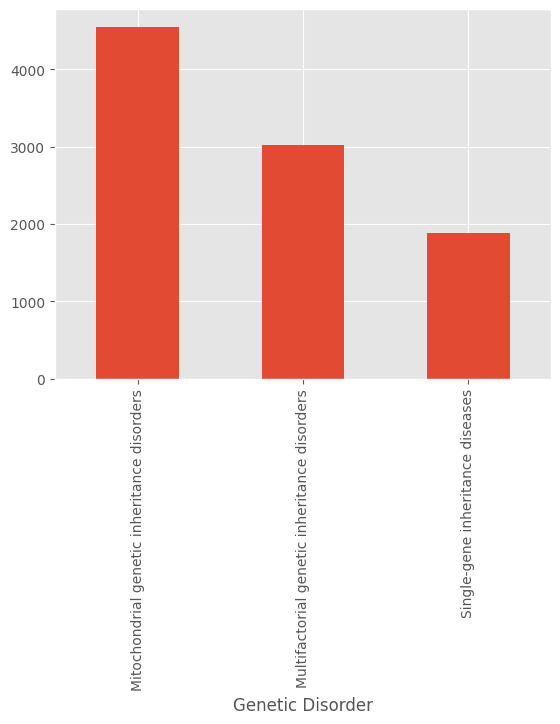

In [ ]:
# @title Number of patients with each genetic disorder

submission.groupby('Genetic Disorder')['Patient Id'].count().plot(kind='bar')

In [ ]:
submission['Genetic Disorder'].replace(0, 'Mitochondrial genetic inheritance disorders', inplace= True)
submission['Genetic Disorder'].replace(2, 'Single-gene inheritance diseases', inplace= True)
submission['Genetic Disorder'].replace(1, 'Multifactorial genetic inheritance disorders', inplace= True)
submission.head()

,Patient Id,Genetic Disorder,Disorder Subclass
0,PID0x4175,Multifactorial genetic inheritance disorders,5
1,PID0x21f5,Mitochondrial genetic inheritance disorders,7
2,PID0x49b8,Mitochondrial genetic inheritance disorders,6
3,PID0x2d97,Mitochondrial genetic inheritance disorders,6
4,PID0x58da,Mitochondrial genetic inheritance disorders,6


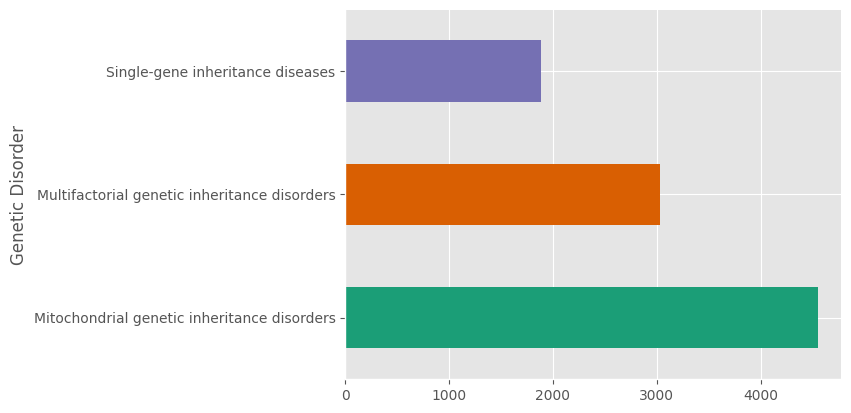

In [ ]:
# @title Genetic Disorder

from matplotlib import pyplot as plt
import seaborn as sns
submission.groupby('Genetic Disorder').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
submission['Disorder Subclass'].replace(0, "Alzheimer's", inplace= True)
submission['Disorder Subclass'].replace(1, 'Cancer', inplace= True)
submission['Disorder Subclass'].replace(2, 'Cystic fibrosis', inplace= True)
submission['Disorder Subclass'].replace(3, 'Diabetes', inplace= True)
submission['Disorder Subclass'].replace(4, 'Hemochromatosis', inplace= True)
submission['Disorder Subclass'].replace(5, "Leber's hereditary optic neuropathy", inplace= True)
submission['Disorder Subclass'].replace(6, 'Leigh syndrome', inplace= True)
submission['Disorder Subclass'].replace(7, 'Mitochondrial myopathy', inplace= True)
submission['Disorder Subclass'].replace(8, 'Tay-Sachs', inplace= True)
submission.head()

,Patient Id,Genetic Disorder,Disorder Subclass
0,PID0x4175,Multifactorial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x21f5,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
2,PID0x49b8,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,PID0x2d97,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x58da,Mitochondrial genetic inheritance disorders,Leigh syndrome


In [ ]:
submission.head(20)

,Patient Id,Genetic Disorder,Disorder Subclass
0,PID0x4175,Multifactorial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x21f5,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
2,PID0x49b8,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,PID0x2d97,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x58da,Mitochondrial genetic inheritance disorders,Leigh syndrome
5,PID0x96b6,Multifactorial genetic inheritance disorders,Leber's hereditary optic neuropathy
6,PID0x399,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
7,PID0x6819,Multifactorial genetic inheritance disorders,Leber's hereditary optic neuropathy
8,PID0x9697,Mitochondrial genetic inheritance disorders,Hemochromatosis
9,PID0x628a,Multifactorial genetic inheritance disorders,Leber's hereditary optic neuropathy


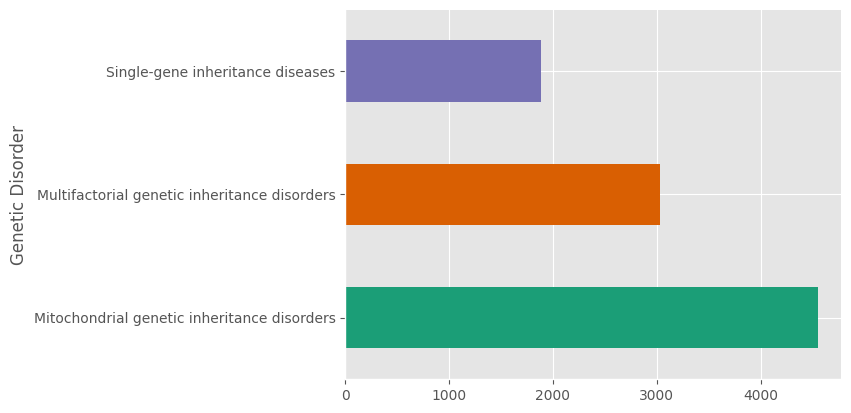

In [ ]:
# @title Genetic Disorder

from matplotlib import pyplot as plt
import seaborn as sns
submission.groupby('Genetic Disorder').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# convert submission dataframe to csv.
submission.to_csv('/content/drive/MyDrive/Genetic_Disorder/final_submission_new.csv', index= False)
print('Submission csv is ready')

Submission csv is ready
